# Ejercicio 1
## Grupo 3:
    - De Benedetto Celeste
    - Sandroni Morena
    - Tripodi Iglesias Adriana
    - Zimbimbakis Francisco

### IMPORTACIONES Y LECTURA DE DATASET


In [1]:
!pip install 'dtreeviz'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
import dtreeviz

from sklearn.neighbors import LocalOutlierFactor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

dataSet = 'https://raw.githubusercontent.com/franzimbi/TA047R-2C2024-GRUPO03/refs/heads/main/tp1/dataSets/weatherAUS.csv?token=GHSAT0AAAAAACVP4BK6VPM3IQ2HRBL75ZRUZYEEZ2A'
dataSet = pd.read_csv(dataSet)

In [3]:
print(f"Cantidad de columnas: {dataSet.shape[1]}")
print(f"Cantidad de registros: {dataSet.shape[0]}")
print(f"Cantidad de filas: {dataSet.shape[0]}")

print("\nPorcentaje de nulos por columna:")
for column in dataSet.columns:
  percentage_nulls = (dataSet[column].isnull().sum() / dataSet.shape[0]) * 100
  print(f"{column}: {percentage_nulls:.2f}%")


Cantidad de columnas: 23
Cantidad de registros: 145460
Cantidad de filas: 145460

Porcentaje de nulos por columna:
Date: 0.00%
Location: 0.00%
MinTemp: 1.02%
MaxTemp: 0.87%
Rainfall: 2.24%
Evaporation: 43.17%
Sunshine: 48.01%
WindGustDir: 7.10%
WindGustSpeed: 7.06%
WindDir9am: 7.26%
WindDir3pm: 2.91%
WindSpeed9am: 1.21%
WindSpeed3pm: 2.11%
Humidity9am: 1.82%
Humidity3pm: 3.10%
Pressure9am: 10.36%
Pressure3pm: 10.33%
Cloud9am: 38.42%
Cloud3pm: 40.81%
Temp9am: 1.21%
Temp3pm: 2.48%
RainToday: 2.24%
RainTomorrow: 2.25%


### LIMPIEZA Y COPIA DE DATASET

In [4]:
print(dataSet['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


Las regiones que nos tocaron contienen los siguientes territorios:

Victoria:
* Ballarat
* Bendigo
* Sale
* MelbourneAirport
* Melbourne
*  Mildura
*  Nhil
*  Watsonia
*  Dartmoor

Territorio del Norte:
*    AliceSprings
*    Darwin
*    Katherine
*    Uluru

Australia Meridional:
*    Adelaide
*    MountGambier
*    Nuriootpa
*    Woomera

Australia Occidental:
*    Albany
*    Witchcliffe
*    PearceRAAF
*    PerthAirport
*    Perth
*    SalmonGums
*    Walpole

Tasmania:
*    Hobart
*    Launceston

Borramos todo lo que no pertenece a nuestro dataSet y agregamos la columna de la region, para poder tenerlas identificadas

In [5]:
locations_set = {
    'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil',
    'Watsonia', 'Dartmoor', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru',
    'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe',
    'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart',
    'Launceston'
}

dataSet_copy = dataSet.copy(deep=True)
dataSet_copy = dataSet_copy[dataSet_copy['Location'].isin(locations_set)]

In [6]:
victoria = {'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Watsonia', 'Dartmoor'}
territorio_del_norte = {'AliceSprings', 'Darwin', 'Katherine', 'Uluru'}
australia_meridional = {'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera'}
australia_occidental = {'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole'}
tasmania = {'Hobart', 'Launceston'}

dataSet_copy['Region'] = ''
dataSet_copy['Region'] = dataSet_copy['Region'].where(~dataSet_copy['Location'].isin(victoria), 'Victoria')
dataSet_copy['Region'] = dataSet_copy['Region'].where(~dataSet_copy['Location'].isin(territorio_del_norte), 'Territorio del Norte')
dataSet_copy['Region'] = dataSet_copy['Region'].where(~dataSet_copy['Location'].isin(australia_meridional), 'Australia Meridional')
dataSet_copy['Region'] = dataSet_copy['Region'].where(~dataSet_copy['Location'].isin(australia_occidental), 'Australia Occidental')
dataSet_copy['Region'] = dataSet_copy['Region'].where(~dataSet_copy['Location'].isin(tasmania), 'Tasmania')


In [7]:
dataSet_copy.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Region']

Limpiamos datos sin sentido o sin informacion (los NaN)

In [8]:
dataSet_copy.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Region            object
dtype: object

In [9]:
# paso el dia de string a fecha
dataSet_copy['Date'] = pd.to_datetime(dataSet_copy['Date'])

In [10]:
# pasa los WindGuestDir, WindDir9am y WindDir3pm a one hot encoding
dataSet_copy = pd.get_dummies(dataSet_copy, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], dummy_na=False)

In [11]:
# pasa la region y localizacion a one hot encoding
dataSet_copy = pd.get_dummies(dataSet_copy, columns=['Location', 'Region'], dummy_na=False)

In [12]:
dataSet_copy = pd.get_dummies(dataSet_copy, columns=['RainToday', 'RainTomorrow'], dummy_na=False)
# Reemplaza valores booleanos por bits (True = 1, False = 0)
for col in dataSet_copy.select_dtypes(include=['bool']).columns:
  dataSet_copy[col] = dataSet_copy[col].astype(int)


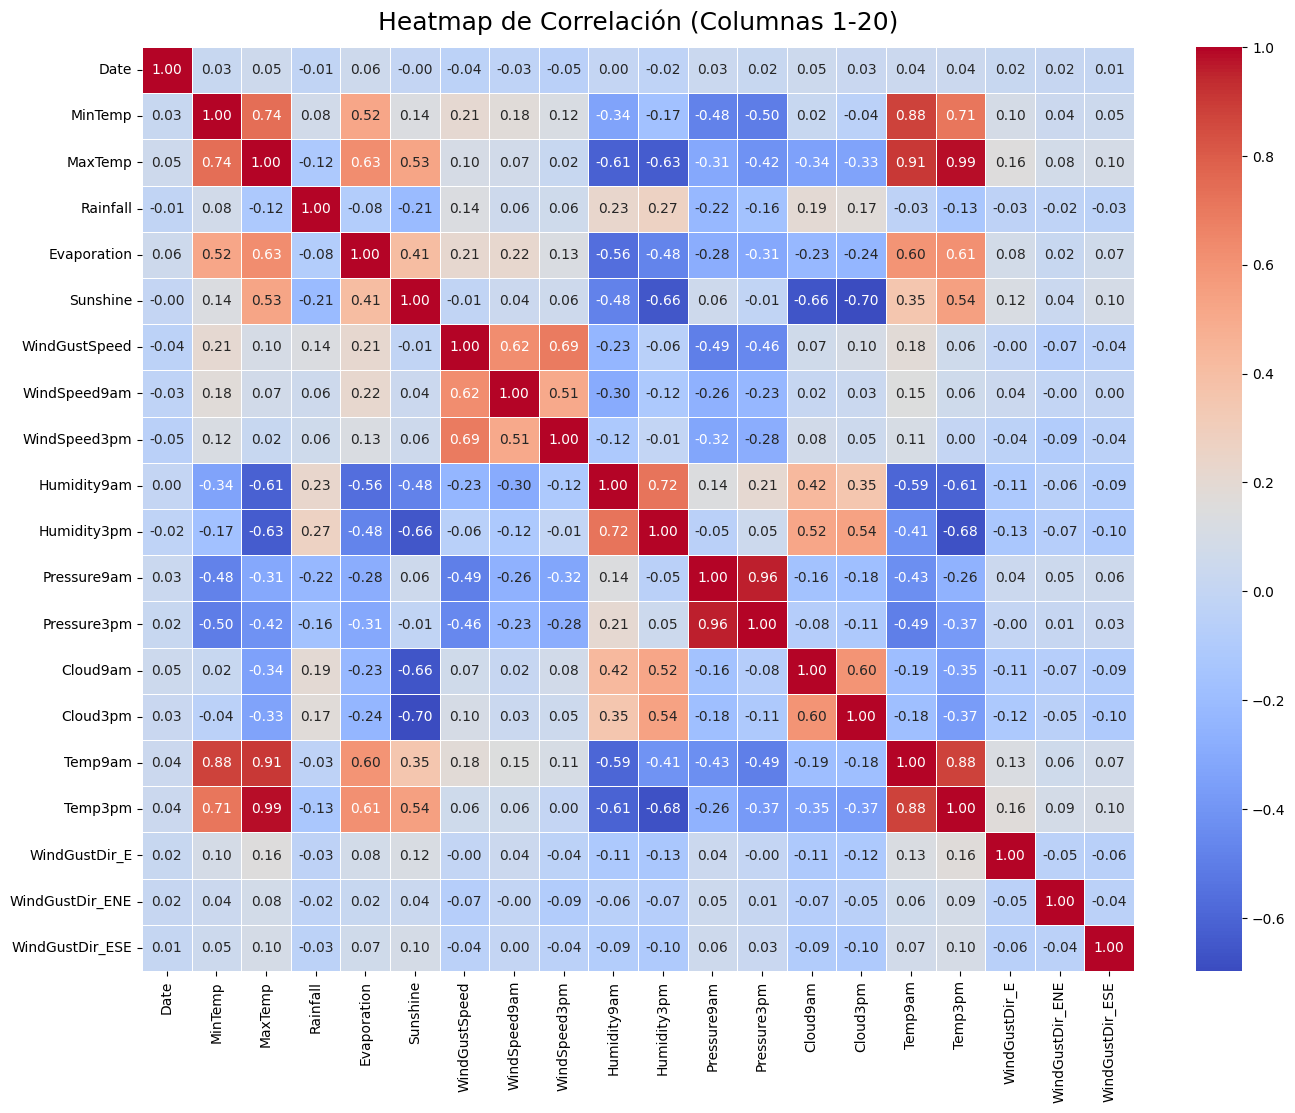

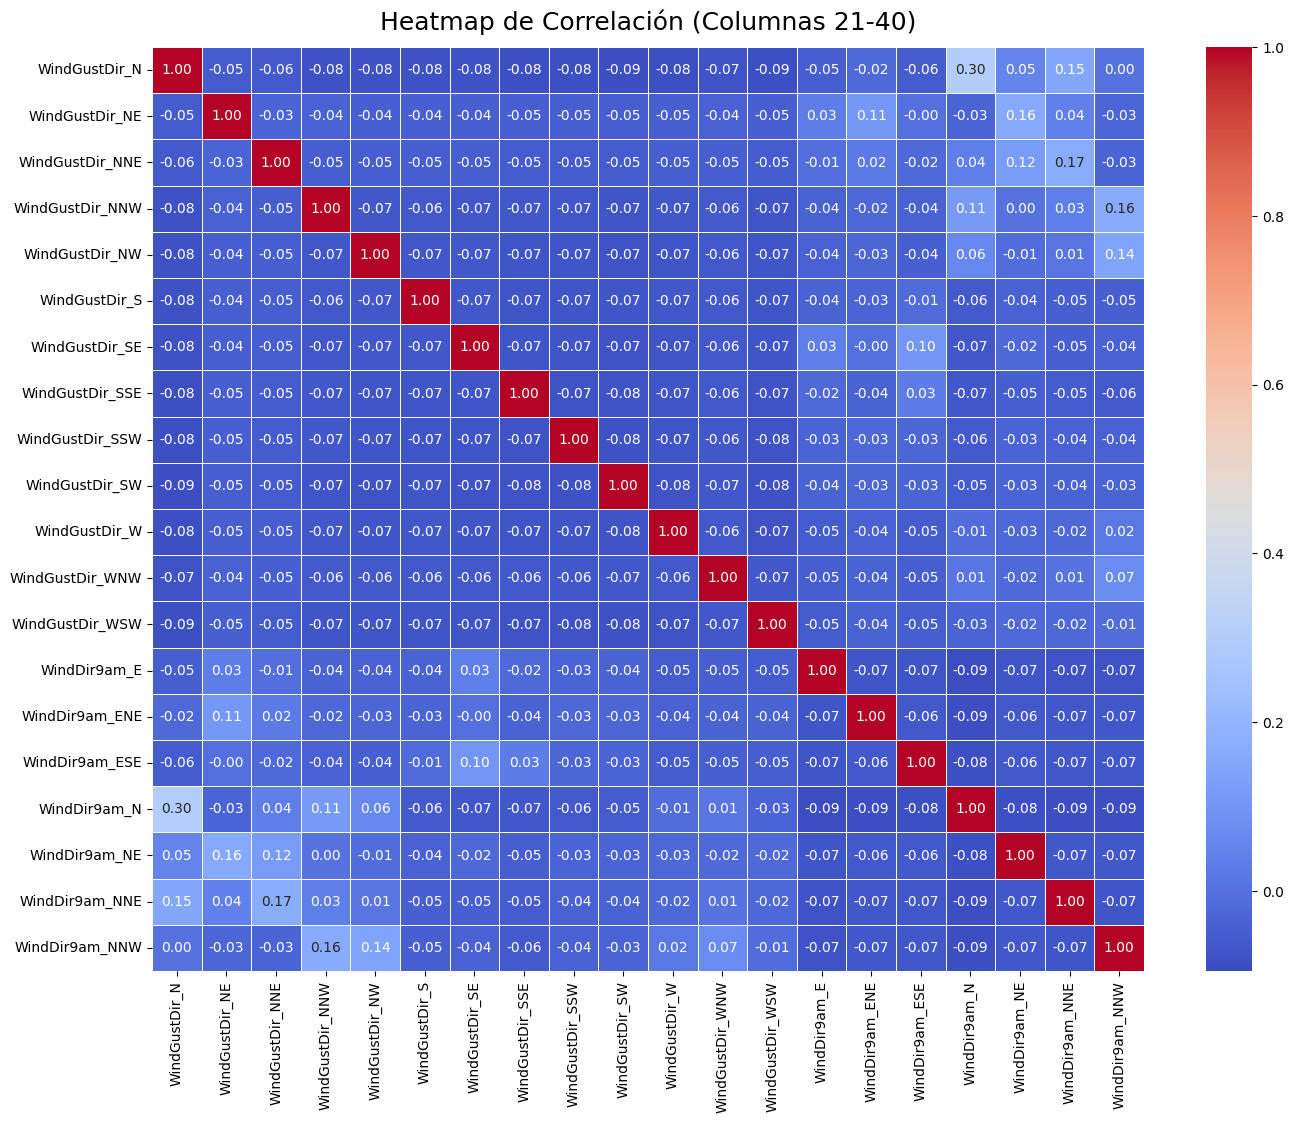

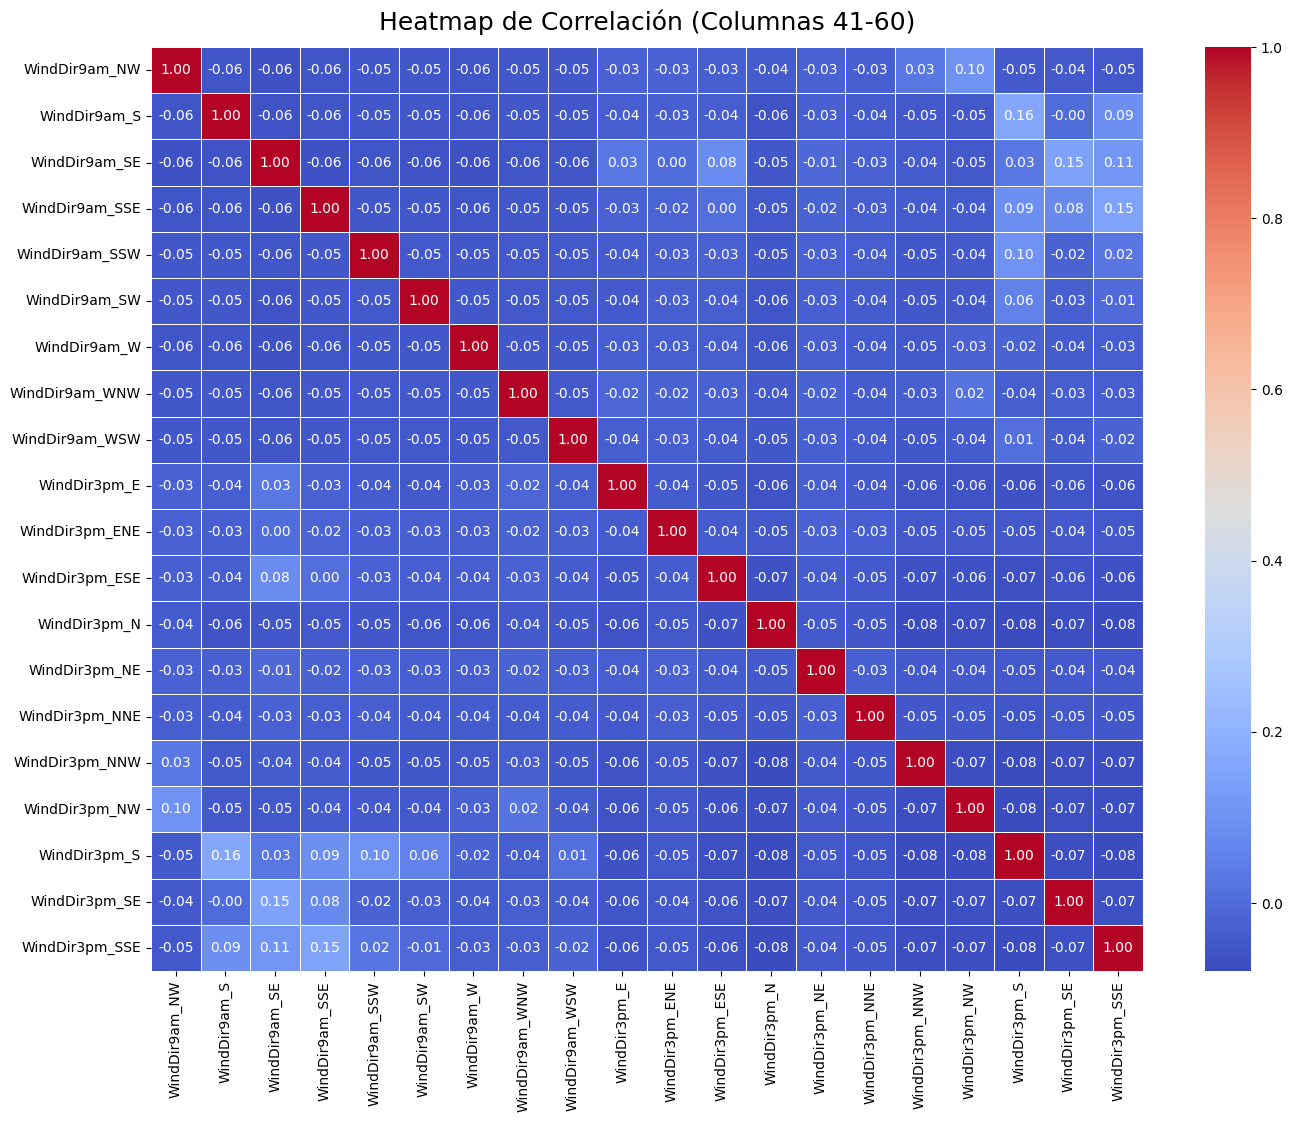

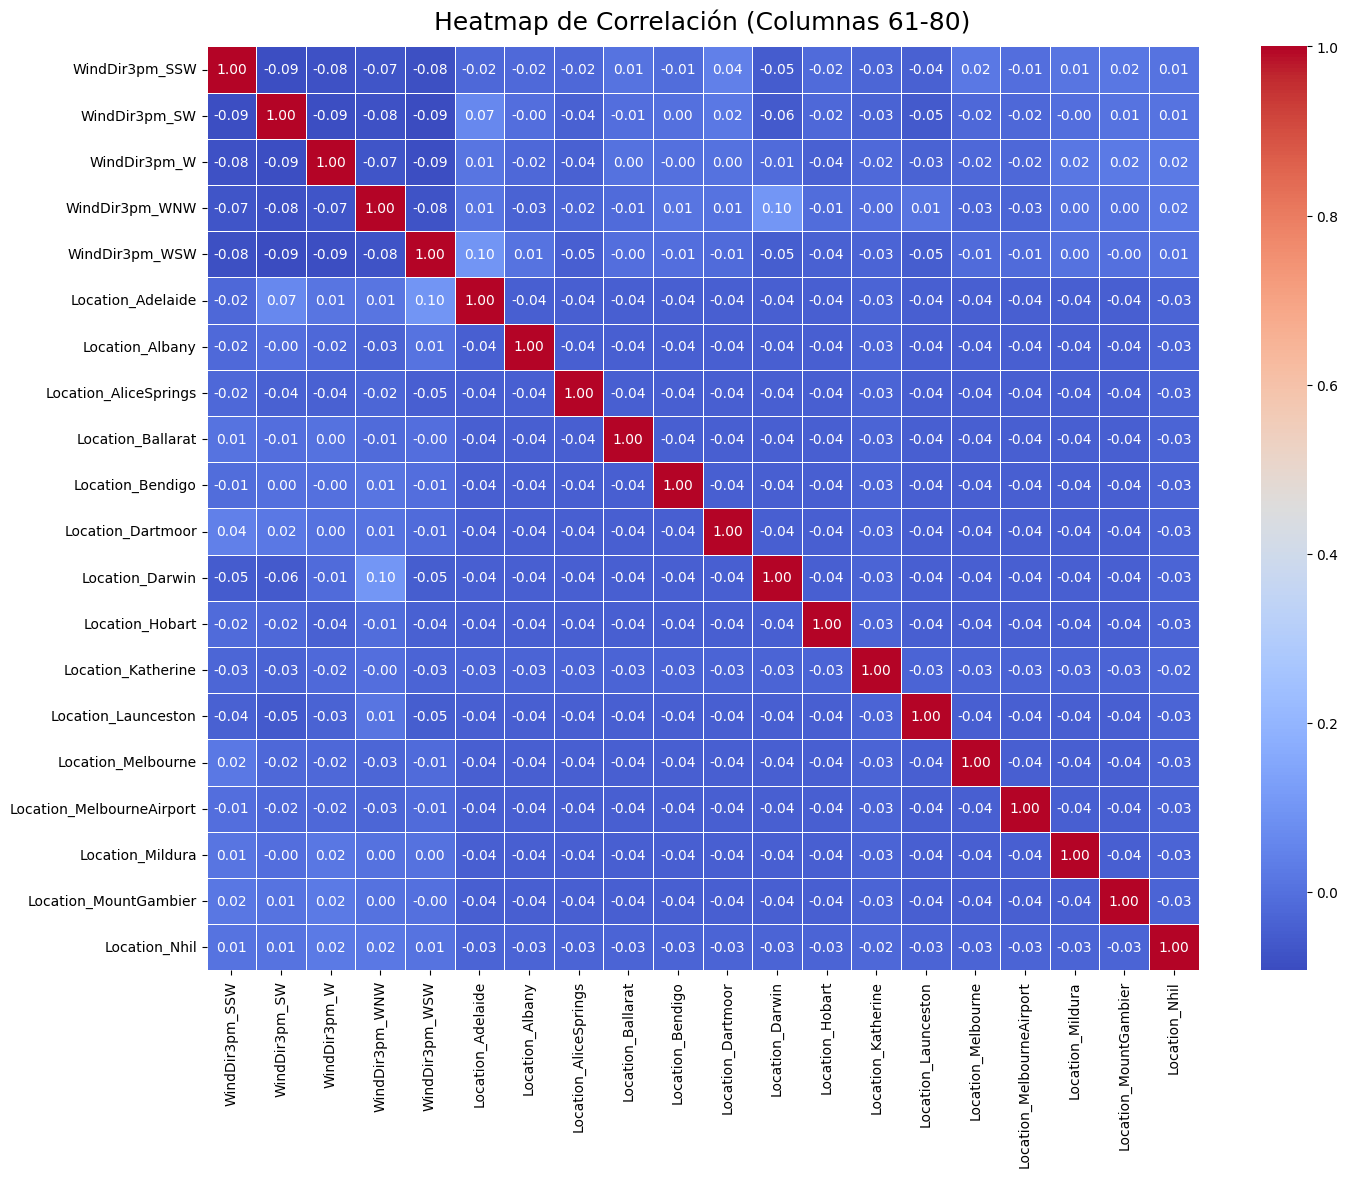

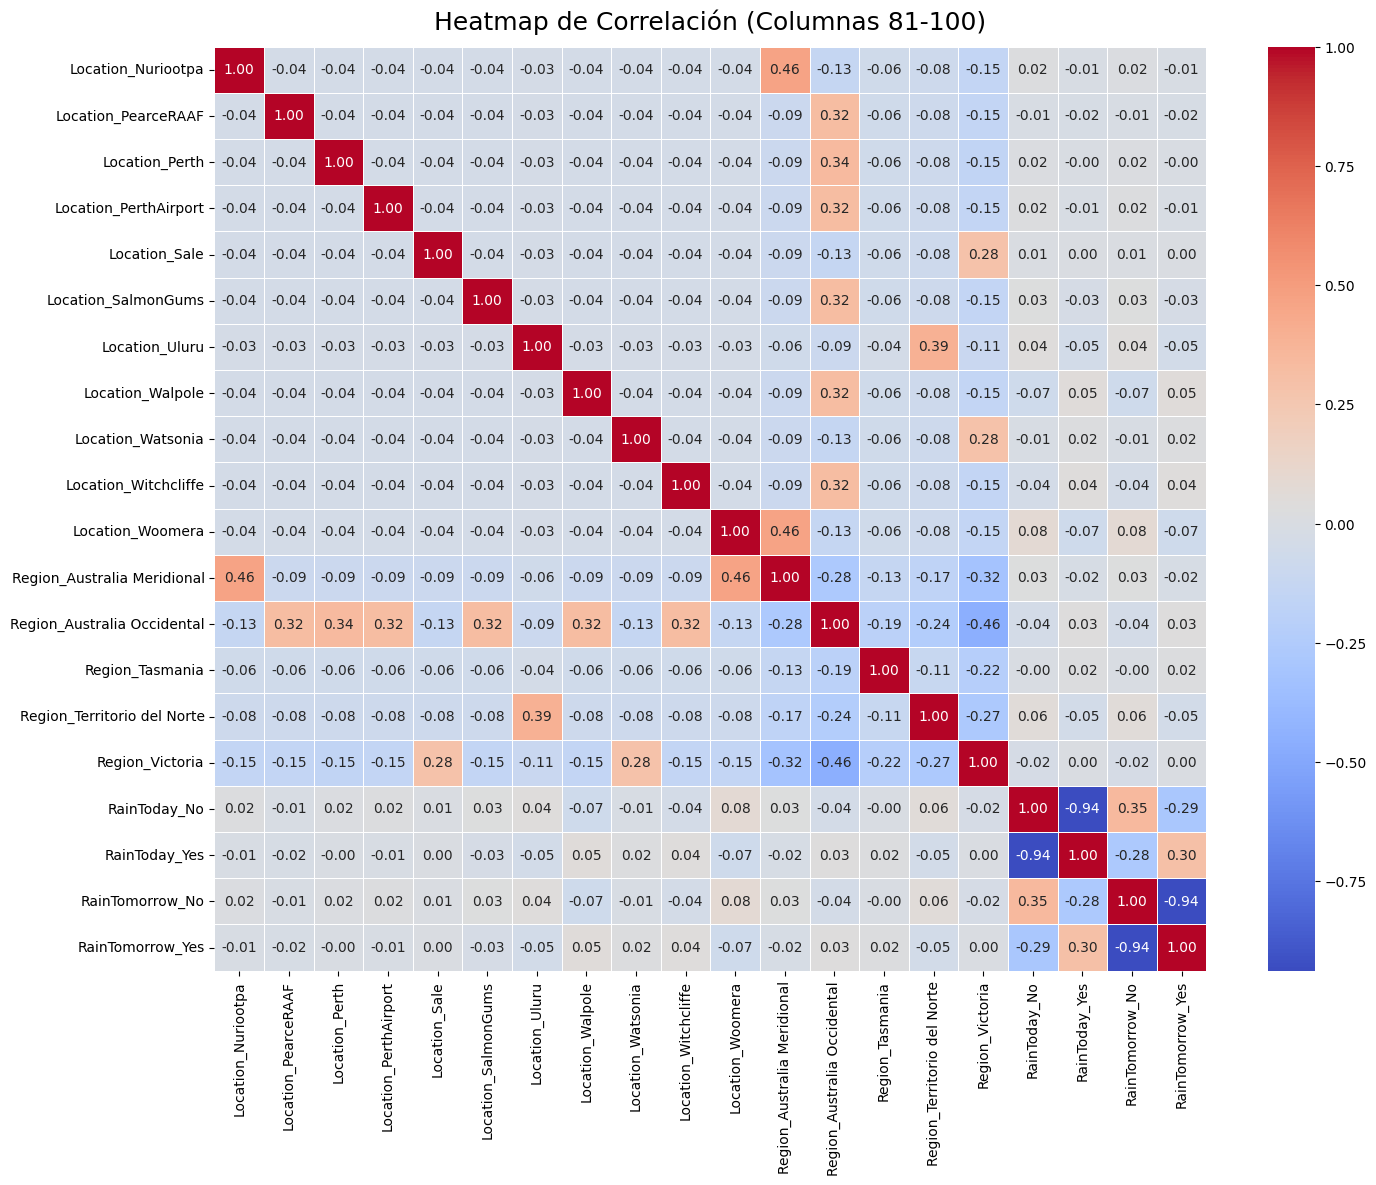

In [13]:
def correlation_heatmap(df, title):
  plt.figure(figsize=(16, 12))
  heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
  heatmap.set_title(title, fontdict={'fontsize': 18}, pad=12)
  plt.show()

num_rows = dataSet_copy.shape[1]
chunk_size = 20
for i in range(0, num_rows, chunk_size):
  end = min(i + chunk_size, num_rows)
  chunk = dataSet_copy.iloc[:, i:end]
  title = f"Heatmap de Correlación (Columnas {i+1}-{end})"
  correlation_heatmap(chunk, title)


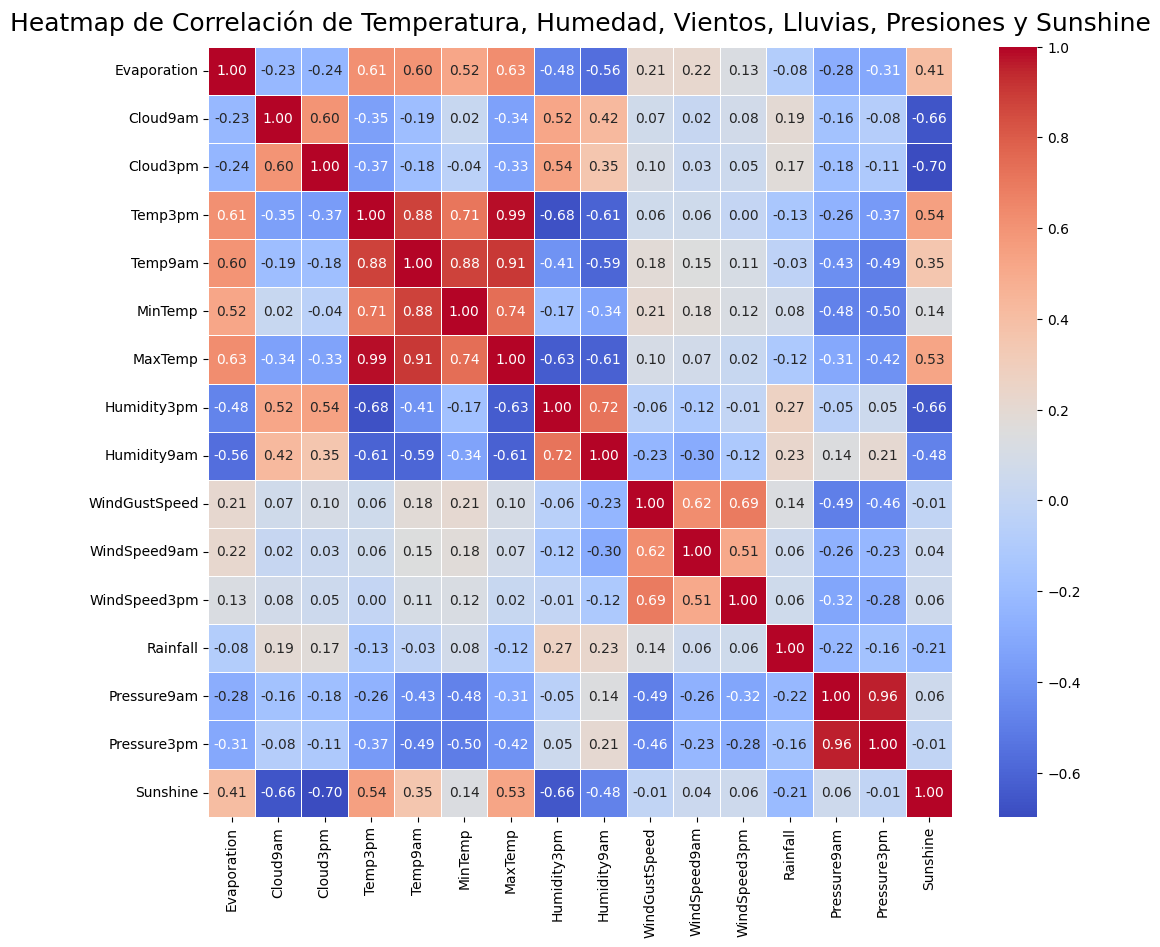

In [14]:
# heapmap de correlación de temperaturas, humedad, vientos, lluvias, presiones, sunshine
columns_of_interest = ['Evaporation','Cloud9am',
 'Cloud3pm','Temp3pm', 'Temp9am', 'MinTemp', 'MaxTemp', 'Humidity3pm', 'Humidity9am', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm', 'Rainfall', 'Pressure9am', 'Pressure3pm', 'Sunshine']
df_subset = dataSet_copy[columns_of_interest]

# Crea el heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df_subset.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
heatmap.set_title("Heatmap de Correlación de Temperatura, Humedad, Vientos, Lluvias, Presiones y Sunshine", fontdict={'fontsize': 18}, pad=12)
plt.show()


se puede ver una fuerte correlacion entre la tempMax y la temp3pm, entre la tempMin y la temp9am, entre la tempMin y tempMax, entre la temp9am y temp3pm, la pres9am y pres3pm, la windSpeed3pm y windGustSpeed.

una correlacion inversa entre cloud3pm y sunshine, entre la humidity3pm y tempMax, humidity3pm con temp3pm,

In [15]:
# Filtrar filas con NaN en Temp3pm o MaxTemp, pero no en ambas
rows_with_nan_temp3pm_or_maxtemp = dataSet_copy[
    (dataSet_copy['Temp3pm'].isnull() & ~dataSet_copy['MaxTemp'].isnull()) |
    (~dataSet_copy['Temp3pm'].isnull() & dataSet_copy['MaxTemp'].isnull())
]

# Mostrar solo las columnas Temp3pm y MaxTemp de las filas filtradas
print(rows_with_nan_temp3pm_or_maxtemp[['Temp3pm', 'MaxTemp']])

# Contar cuántas filas tienen NaN en cada columna
count_nan_temp3pm = rows_with_nan_temp3pm_or_maxtemp['Temp3pm'].isnull().sum()
count_nan_maxtemp = rows_with_nan_temp3pm_or_maxtemp['MaxTemp'].isnull().sum()

print(f"Cantidad de filas con NaN en Temp3pm: {count_nan_temp3pm}")
print(f"Cantidad de filas con NaN en MaxTemp: {count_nan_maxtemp}")


# Reemplazar NaN en Temp3pm con el valor de MaxTemp si MaxTemp no es NaN
dataSet_copy.loc[(dataSet_copy['Temp3pm'].isnull()) & (~dataSet_copy['MaxTemp'].isnull()), 'Temp3pm'] = dataSet_copy['MaxTemp']

# Reemplazar NaN en MaxTemp con el valor de Temp3pm si Temp3pm no es NaN
dataSet_copy.loc[(dataSet_copy['MaxTemp'].isnull()) & (~dataSet_copy['Temp3pm'].isnull()), 'MaxTemp'] = dataSet_copy['Temp3pm']


        Temp3pm  MaxTemp
55584       NaN     21.7
55898       NaN     18.1
55927       NaN     23.7
55941       NaN     25.9
56194       NaN     23.9
...         ...      ...
144285      NaN     19.4
144306     18.3      NaN
144307     21.5      NaN
145335     34.4      NaN
145459     20.9      NaN

[1533 rows x 2 columns]
Cantidad de filas con NaN en Temp3pm: 1434
Cantidad de filas con NaN en MaxTemp: 99


In [16]:
# Calcular el porcentaje de NaN en cada columna
nan_percentage = dataSet_copy.isnull().mean() * 100

# Filtrar las columnas con un porcentaje de NaN mayor a 0
columns_with_nan = nan_percentage[nan_percentage > 0]
print(columns_with_nan)

MinTemp           1.127459
MaxTemp           0.927555
Rainfall          2.222933
Evaporation      37.056879
Sunshine         38.305613
WindGustSpeed     5.577323
WindSpeed9am      0.491764
WindSpeed3pm      1.393998
Humidity9am       1.812463
Humidity3pm       3.679567
Pressure9am       6.683459
Pressure3pm       6.695453
Cloud9am         35.404339
Cloud3pm         39.133216
Temp9am           1.046165
Temp3pm           0.927555
dtype: float64


In [17]:
# Mostrar cantidad de filas sin valores nan

rows_without_nan = dataSet_copy.dropna().shape[0]
print(f"Cantidad de filas sin valores NaN: {rows_without_nan}")

Cantidad de filas sin valores NaN: 32343


In [18]:
# Ordenar los valores posibles de Sunshine de menor a mayor
sunshine_values = dataSet_copy['Sunshine'].sort_values().unique()
print("Valores posibles de Sunshine ordenados de menor a mayor:", sunshine_values)

# Ordenar los valores posibles de Cloud3pm de menor a mayor
cloud3pm_values = dataSet_copy['Cloud3pm'].sort_values().unique()
print("Valores posibles de Cloud3pm ordenados de menor a mayor:", cloud3pm_values)

Valores posibles de Sunshine ordenados de menor a mayor: [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.5  nan]
Valores posibles de Cloud3pm ordenados de menor a mayor: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. nan]


dado que tenemos 10 valores de cloud posibles, divido los valores posibles de sunshine en 10 y los asocio entre si, para reemplazar los nans

In [19]:
# Asocio el cloud con los valores posibles de sunshine
grupo_9 = [0.0, 0.1, 0.2, 0.3, 0.4]
grupo_8 = [0.5, 0.6, 0.7, 0.8, 0.9]
grupo_7 = [1.0, 1.1, 1.2, 1.3, 1.4]
grupo_6 = [1.5, 1.6, 1.7, 1.8, 1.9]
grupo_5 = [2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
grupo_4 = [2.6, 2.7, 2.8, 2.9, 3.0, 3.1]
grupo_3 = [3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9]
grupo_2 = [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7]
grupo_1 = [4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7]
grupo_0 = [5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.5]

# Reemplazo los NaN de Cloud3pm por su corresponciente 'grupo' de sunshine
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_9)), 'Cloud3pm'] = 9
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_8)), 'Cloud3pm'] = 8
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_7)), 'Cloud3pm'] = 7
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_6)), 'Cloud3pm'] = 6
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_5)), 'Cloud3pm'] = 5
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_4)), 'Cloud3pm'] = 4
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_3)), 'Cloud3pm'] = 3
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_2)), 'Cloud3pm'] = 2
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_1)), 'Cloud3pm'] = 1
dataSet_copy.loc[(dataSet_copy['Cloud3pm'].isnull()) & (dataSet_copy['Sunshine'].isin(grupo_0)), 'Cloud3pm'] = 0

# Reemplazo los NaN de Sunshine por el valor medio de cada 'grupo' asociado con el cloud3pm
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 9), 'Sunshine'] = grupo_9[len(grupo_9)//2]
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 8), 'Sunshine'] = grupo_8[len(grupo_8)//2]
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 7), 'Sunshine'] = grupo_7[len(grupo_7)//2]
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 6), 'Sunshine'] = grupo_6[len(grupo_6)//2]
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 5), 'Sunshine'] = grupo_5[len(grupo_5)//2]
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 4), 'Sunshine'] = grupo_4[len(grupo_4)//2]
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 3), 'Sunshine'] = grupo_3[len(grupo_3)//2]
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 2), 'Sunshine'] = grupo_2[len(grupo_2)//2]
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 1), 'Sunshine'] = grupo_1[len(grupo_1)//2]
dataSet_copy.loc[(dataSet_copy['Sunshine'].isnull()) & (dataSet_copy['Cloud3pm'] == 0), 'Sunshine'] = grupo_0[len(grupo_0)//2]

In [20]:
temperature_difference = dataSet_copy['MaxTemp'] - dataSet_copy['MinTemp']

# Mostrar la variación de temperatura máxima y mínima en todo el dataset
print("Variación de temperatura máxima y mínima:")
print(f"Máxima variación: {temperature_difference.max()}")
print(f"Mínima variación: {temperature_difference.min()}")
print(f"Promedio de variación: {temperature_difference.mean()}")


Variación de temperatura máxima y mínima:
Máxima variación: 31.200000000000003
Mínima variación: -1.0
Promedio de variación: 11.657882095775257


In [21]:
# Reemplazar NaN en MaxTemp con MinTemp + 11.66 si MinTemp no es NaN
dataSet_copy.loc[(dataSet_copy['MaxTemp'].isnull()) & (~dataSet_copy['MinTemp'].isnull()), 'MaxTemp'] = dataSet_copy['MinTemp'] + 11.66

# Reemplazar NaN en MinTemp con MaxTemp - 11.66 si MaxTemp no es NaN
dataSet_copy.loc[(dataSet_copy['MinTemp'].isnull()) & (~dataSet_copy['MaxTemp'].isnull()), 'MinTemp'] = dataSet_copy['MaxTemp'] - 11.66


In [22]:
# Reemplazar NaN en MinTemp con la media
dataSet_copy['MinTemp'].fillna(dataSet_copy['MinTemp'].mean(), inplace=True)

# Reemplazar NaN en MaxTemp con la media
dataSet_copy['MaxTemp'].fillna(dataSet_copy['MaxTemp'].mean(), inplace=True)

# Reemplazar NaN en Rainfall con la media
dataSet_copy['Rainfall'].fillna(dataSet_copy['Rainfall'].mean(), inplace=True)


In [23]:
# Cuantos NaN por columna quedan
missing_values = dataSet_copy.isna().sum()
print(missing_values[missing_values > 0])

Evaporation      27806
Sunshine         20322
WindGustSpeed     4185
WindSpeed9am       369
WindSpeed3pm      1046
Humidity9am       1360
Humidity3pm       2761
Pressure9am       5015
Pressure3pm       5024
Cloud9am         26566
Cloud3pm         20322
Temp9am            785
Temp3pm            696
dtype: int64


In [24]:
dataSet_copy.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
55102 2008-12-01      5.8     17.6       3.2          NaN       NaN   
55103 2008-12-02      4.3     19.5       0.4          NaN       0.7   
55104 2008-12-03      9.5     18.8       0.6          NaN       0.7   
55105 2008-12-04      6.7     21.8       0.2          NaN       NaN   
55106 2008-12-05     13.3     25.6       1.2          NaN       5.3   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
55102           52.0          26.0          30.0         71.0  ...   
55103           44.0          20.0          24.0         66.0  ...   
55104           43.0          22.0          20.0         82.0  ...   
55105           39.0           9.0          22.0         60.0  ...   
55106           61.0          30.0          39.0         74.0  ...   

       Location_Woomera  Region_Australia Meridional  \
55102                 0                            0   
55103                 0                            0   
55104                 0                            0   
55105                 0                            0   
55106                 0                            0   

       Region_Australia Occidental  Region_Tasmania  \
55102                            0                0   
55103                            0                0   
55104                            0                0   
55105                            0                0   
55106                            0                0   

       Region_Territorio del Norte  Region_Victoria  RainToday_No  \
55102                            0                1             0   
55103                            0                1             1   
55104                            0                1             1   
55105                            0                1             1   
55106                            0                1             0   

       RainToday_Yes  RainTomorrow_No  RainTomorrow_Yes  
55102              1                1                 0  
55103              0                1                 0  
55104              0                1                 0  
55105              0                0                 1  
55106              1                1                 0  

[5 rows x 100 columns]

Cantidad de valores de MinTemp que superan 3 o son menores a -3 en Z-score: 23


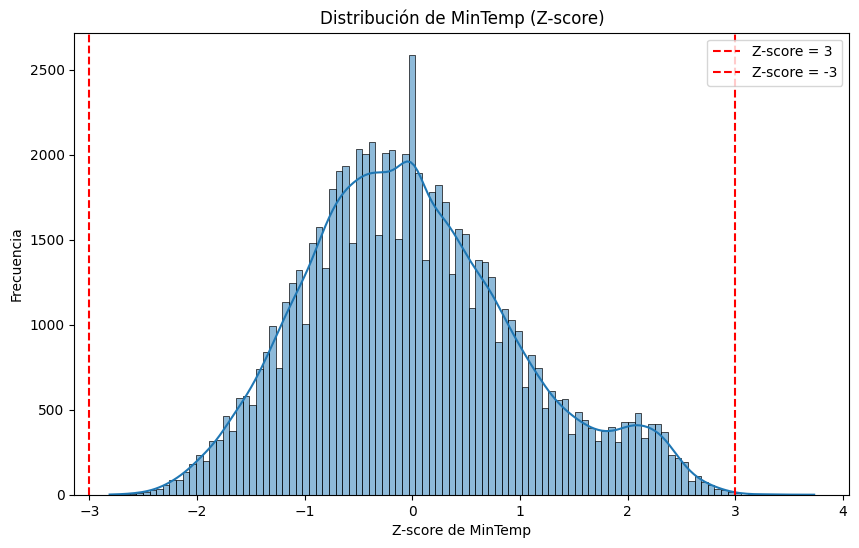

In [25]:
# Calculo Z-score de MinTemp
dataSet_copy['MinTemp_Zscore'] = (dataSet_copy['MinTemp'] - dataSet_copy['MinTemp'].mean()) / dataSet_copy['MinTemp'].std()

# Contar la cantidad de valores que superan 3 o son menores a -3
cantidad_outliers = len(dataSet_copy[(dataSet_copy['MinTemp_Zscore'] > 3) | (dataSet_copy['MinTemp_Zscore'] < -3)])
print(f"Cantidad de valores de MinTemp que superan 3 o son menores a -3 en Z-score: {cantidad_outliers}")

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(dataSet_copy['MinTemp_Zscore'], kde=True)
plt.title('Distribución de MinTemp (Z-score)')
plt.xlabel('Z-score de MinTemp')
plt.ylabel('Frecuencia')

# Marcar los outliers en el gráfico
plt.axvline(3, color='red', linestyle='--', label='Z-score = 3')
plt.axvline(-3, color='red', linestyle='--', label='Z-score = -3')
plt.legend()
plt.show()

In [26]:
# Limitar los valores de MinTemp a un rango de +/- 3
dataSet_copy['MinTemp'] = np.where(dataSet_copy['MinTemp_Zscore'] > 3,
                                   dataSet_copy['MinTemp'].mean() + 3 * dataSet_copy['MinTemp'].std(),
                                   dataSet_copy['MinTemp'])
dataSet_copy['MinTemp'] = np.where(dataSet_copy['MinTemp_Zscore'] < -3,
                                   dataSet_copy['MinTemp'].mean() - 3 * dataSet_copy['MinTemp'].std(),
                                   dataSet_copy['MinTemp'])

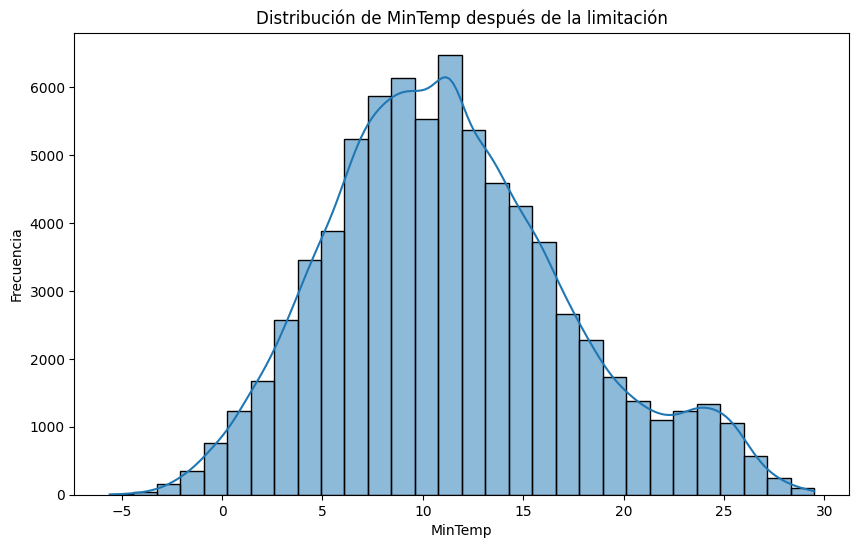

In [27]:
# Histograma de MinTemp
plt.figure(figsize=(10, 6))
sns.histplot(dataSet_copy['MinTemp'], bins=30, kde=True)
plt.title('Distribución de MinTemp después de la limitación')
plt.xlabel('MinTemp')
plt.ylabel('Frecuencia')
plt.show()

Cantidad de valores de MaxTemp que superan 3 o son menores a -3 en Z-score: 18


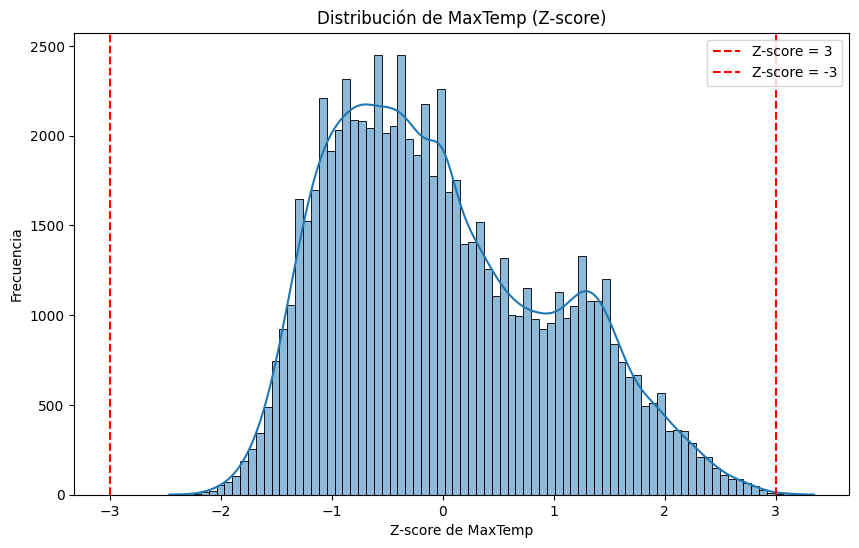

In [28]:
# Calculo Z-score de MaxTemp
dataSet_copy['MaxTemp_Zscore'] = (dataSet_copy['MaxTemp'] - dataSet_copy['MaxTemp'].mean()) / dataSet_copy['MaxTemp'].std()

# Contar la cantidad de valores que superan 3 o son menores a -3
cantidad_outliers = len(dataSet_copy[(dataSet_copy['MaxTemp_Zscore'] > 3) | (dataSet_copy['MaxTemp_Zscore'] < -3)])
print(f"Cantidad de valores de MaxTemp que superan 3 o son menores a -3 en Z-score: {cantidad_outliers}")

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(dataSet_copy['MaxTemp_Zscore'], kde=True)
plt.title('Distribución de MaxTemp (Z-score)')
plt.xlabel('Z-score de MaxTemp')
plt.ylabel('Frecuencia')

# Marcar los outliers en el gráfico
plt.axvline(3, color='red', linestyle='--', label='Z-score = 3')
plt.axvline(-3, color='red', linestyle='--', label='Z-score = -3')
plt.legend()
plt.show()

In [29]:
# Limitar los valores de MaxTemp a un rango de +/- 3
dataSet_copy['MaxTemp'] = np.where(dataSet_copy['MaxTemp_Zscore'] > 3,
                                   dataSet_copy['MaxTemp'].mean() + 3 * dataSet_copy['MaxTemp'].std(),
                                   dataSet_copy['MaxTemp'])
dataSet_copy['MaxTemp'] = np.where(dataSet_copy['MaxTemp_Zscore'] < -3,
                                   dataSet_copy['MaxTemp'].mean() - 3 * dataSet_copy['MaxTemp'].std(),
                                   dataSet_copy['MaxTemp'])

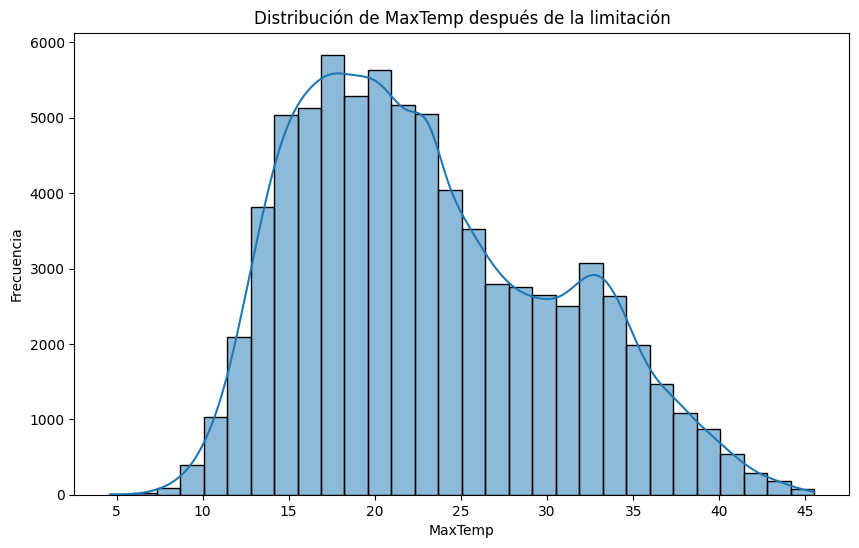

In [30]:
# Histograma de MaxTemp
plt.figure(figsize=(10, 6))
sns.histplot(dataSet_copy['MaxTemp'], bins=30, kde=True)
plt.title('Distribución de MaxTemp después de la limitación')
plt.xlabel('MaxTemp')
plt.ylabel('Frecuencia')
plt.show()

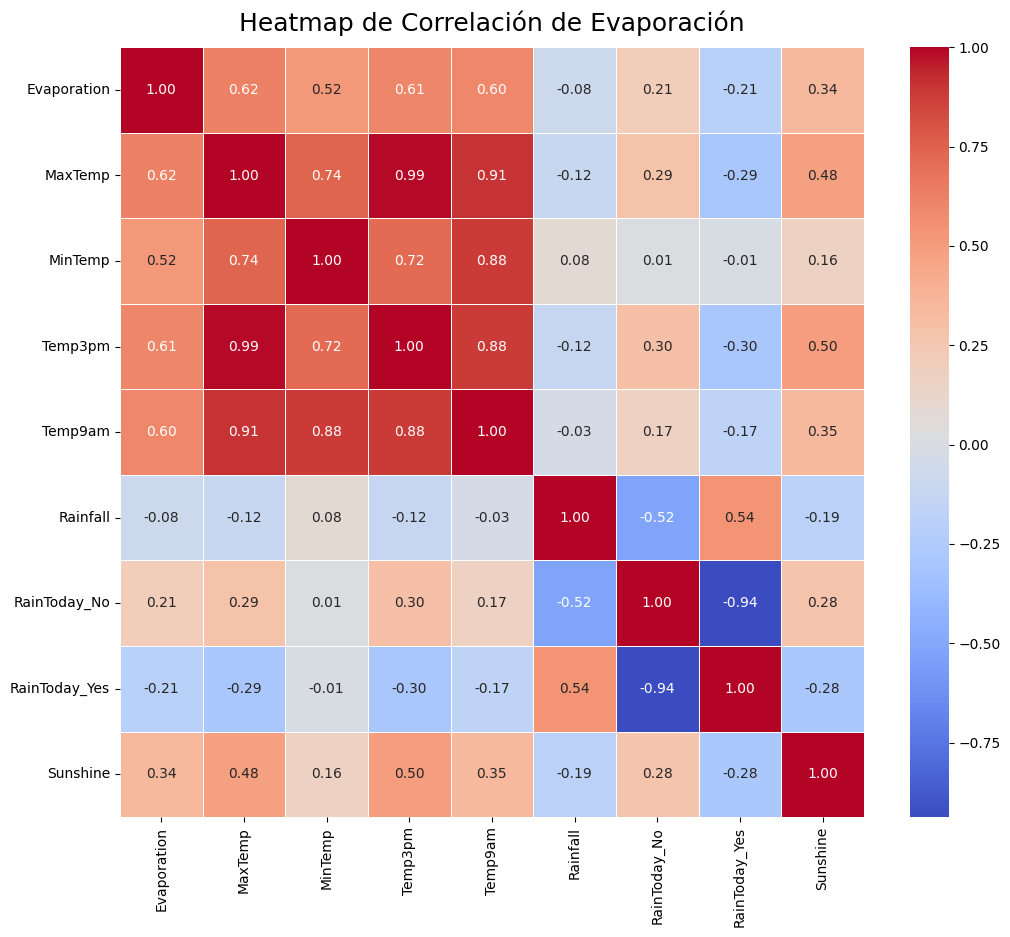

In [31]:
# Ver correlación de evaporación contra todas las otras columnas interesantes

# Seleccionar las columnas de interés
columns_of_interest = ['Evaporation', 'MaxTemp', 'MinTemp', 'Temp3pm', 'Temp9am', 'Rainfall', 'RainToday_No', 'RainToday_Yes', 'Sunshine']
df_subset = dataSet_copy[columns_of_interest]

# Crear el heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df_subset.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
heatmap.set_title("Heatmap de Correlación de Evaporación", fontdict={'fontsize': 18}, pad=12)
plt.show()


muy baja, no podemos hacer nada

In [32]:
dataSetno_nan = dataSet_copy.dropna().copy()
print(f"Tamaño del dataset sin NaN: {dataSetno_nan.shape}")

Tamaño del dataset sin NaN: (35659, 102)


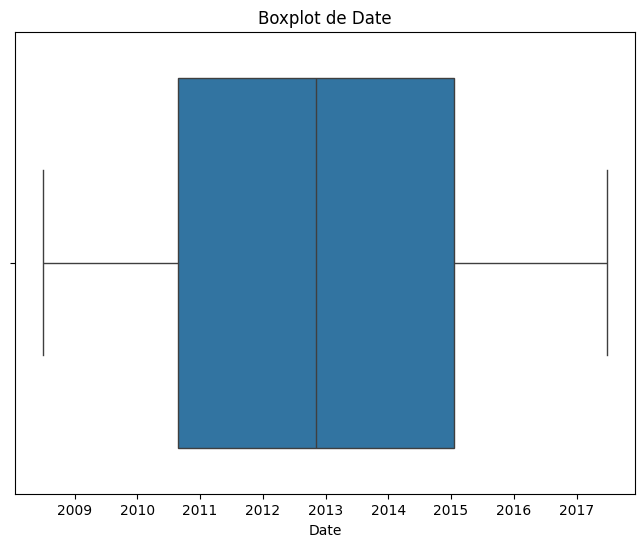

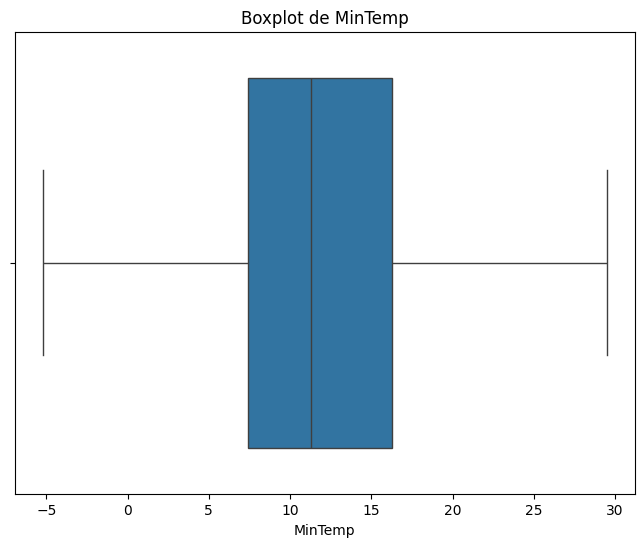

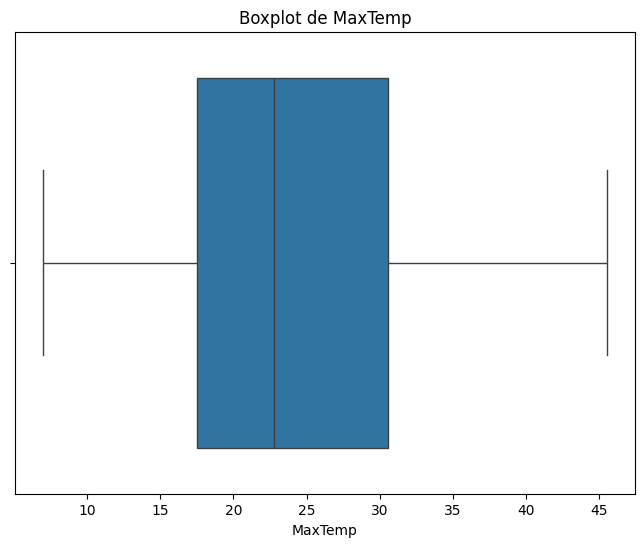

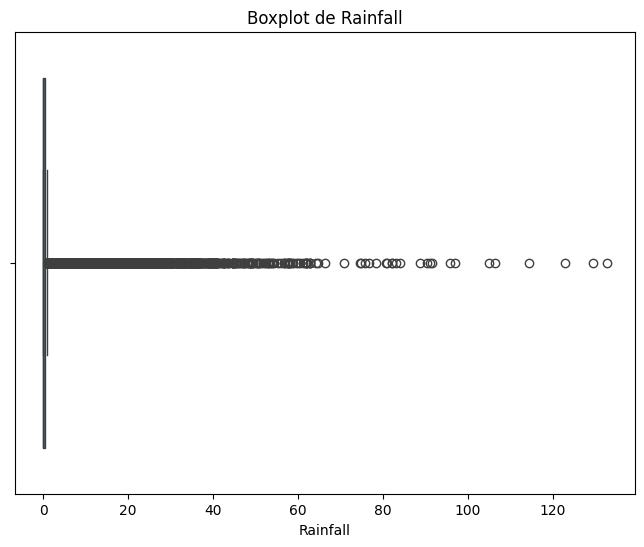

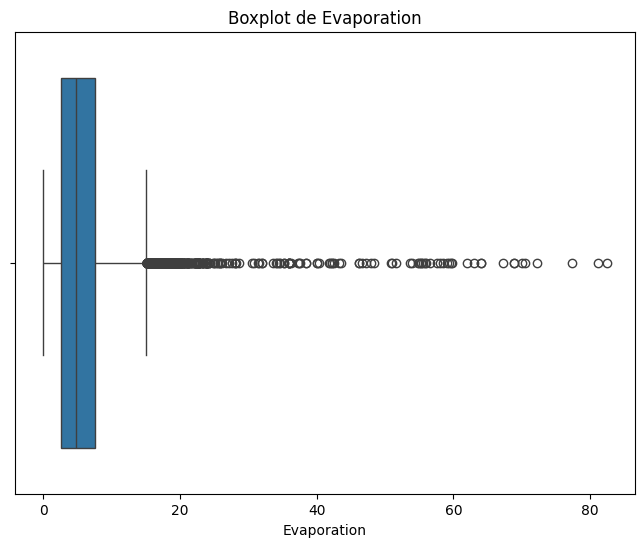

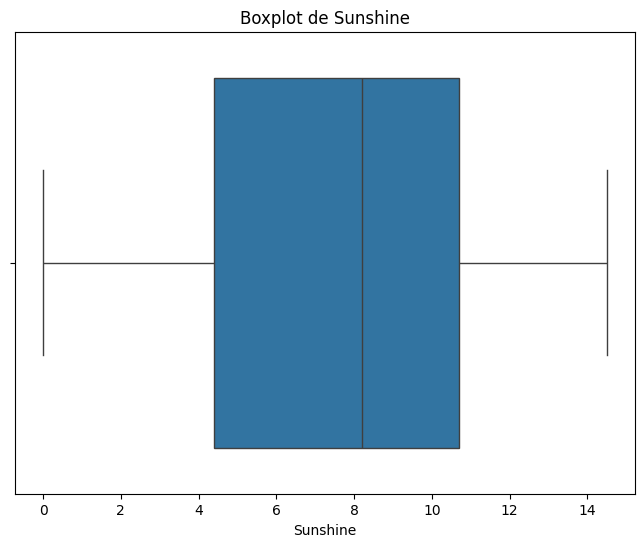

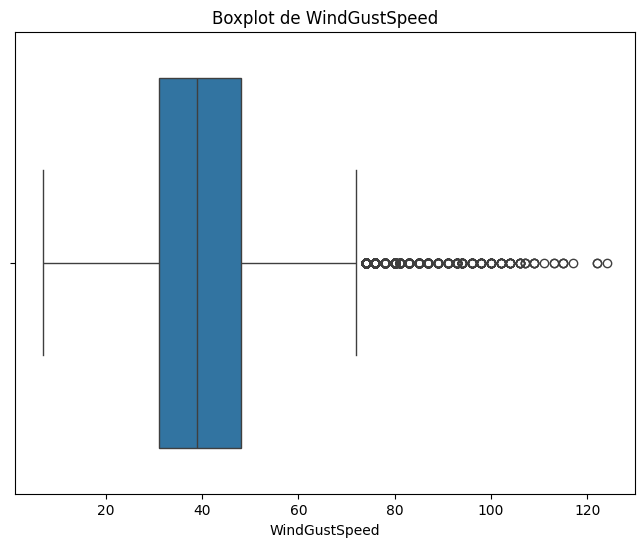

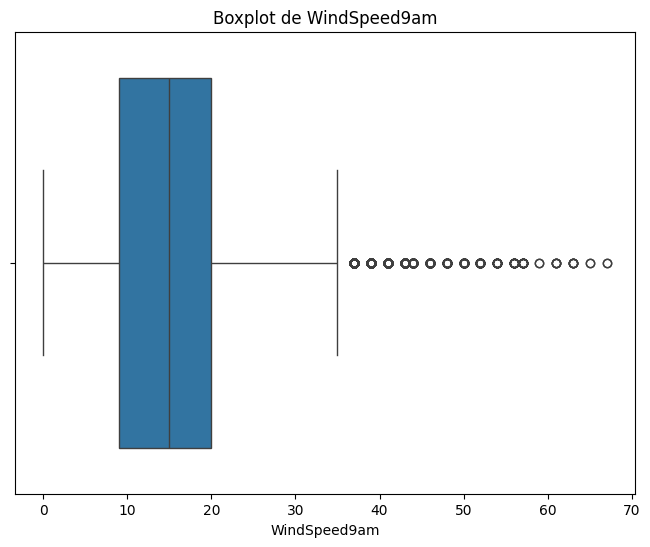

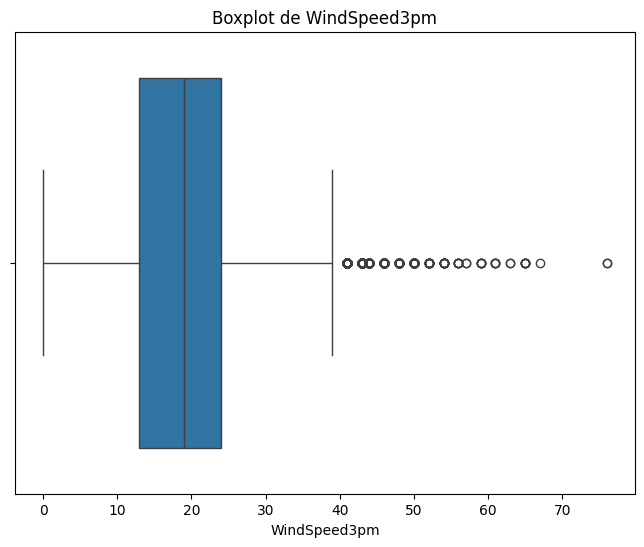

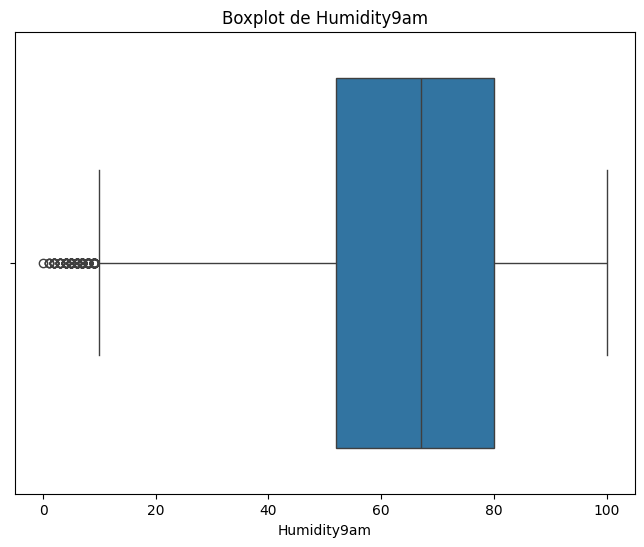

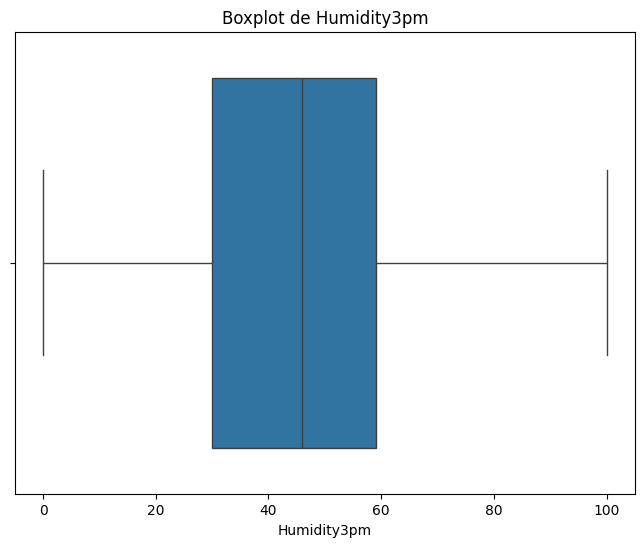

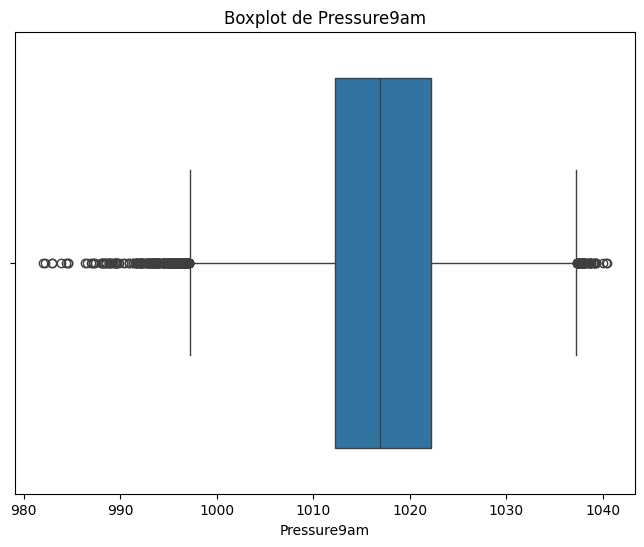

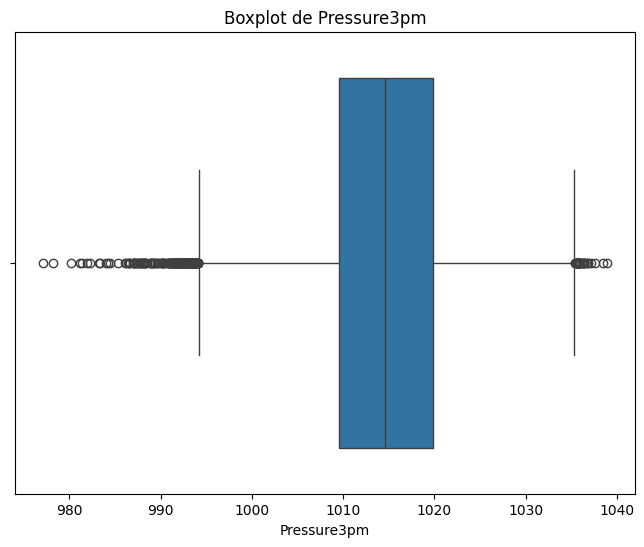

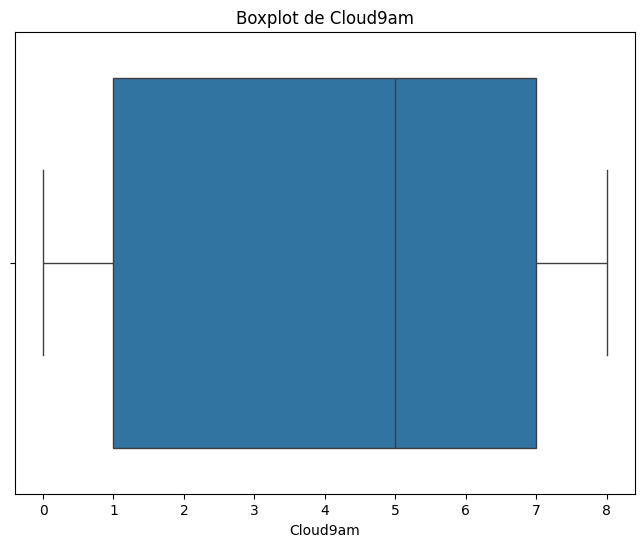

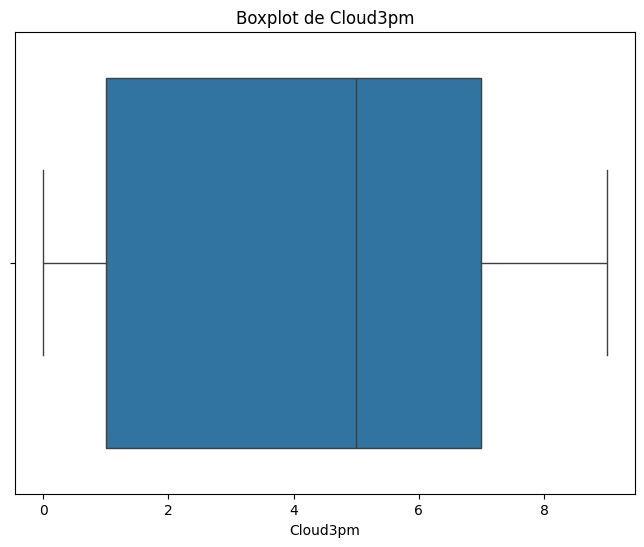

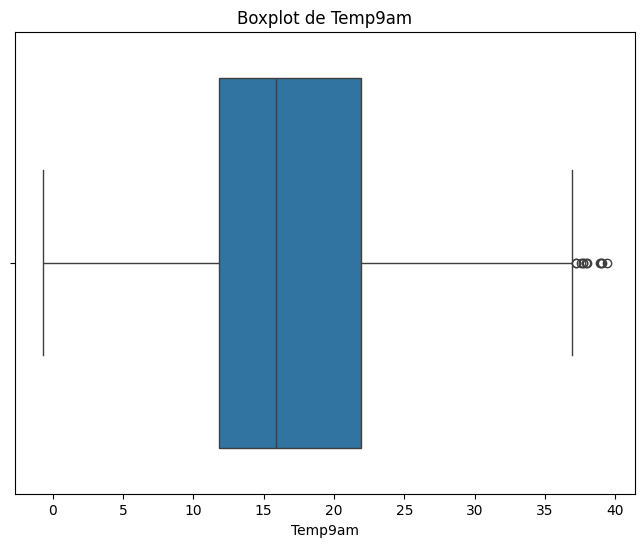

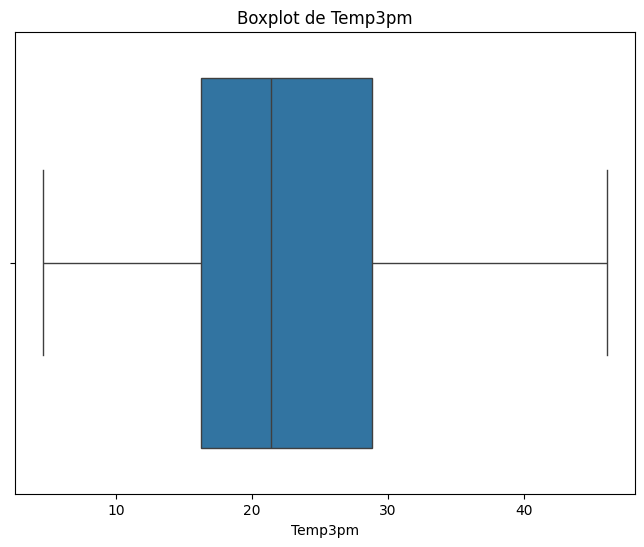

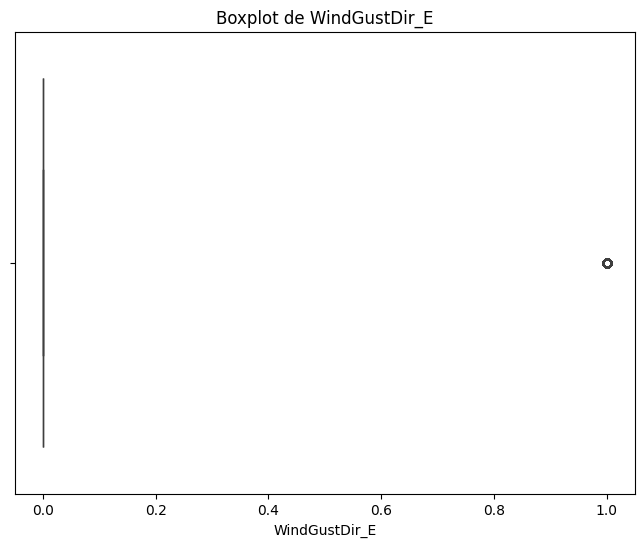

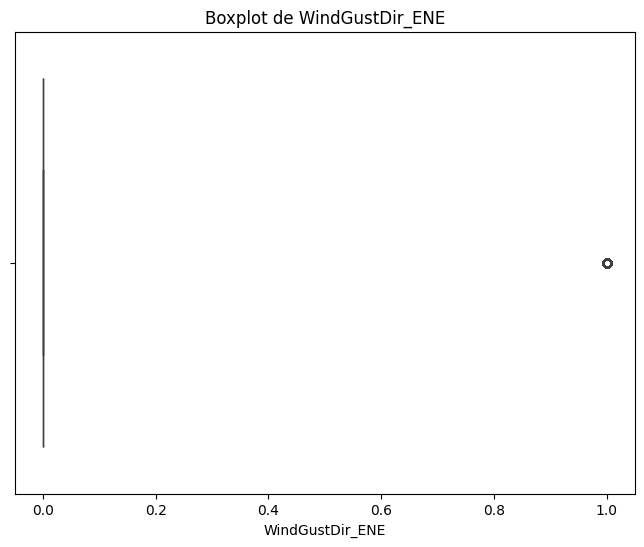

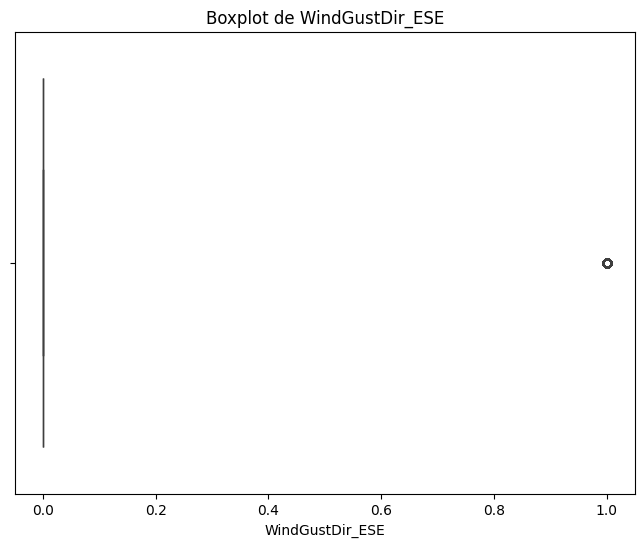

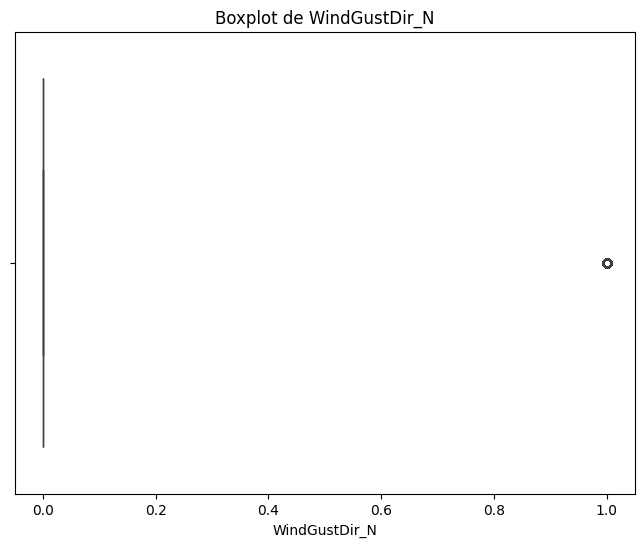

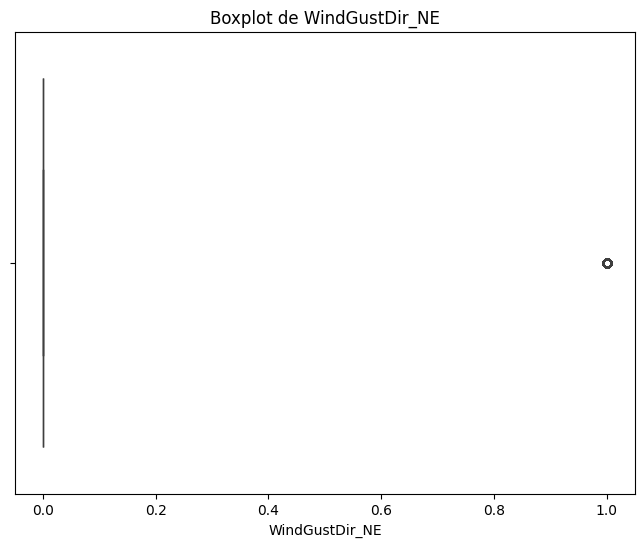

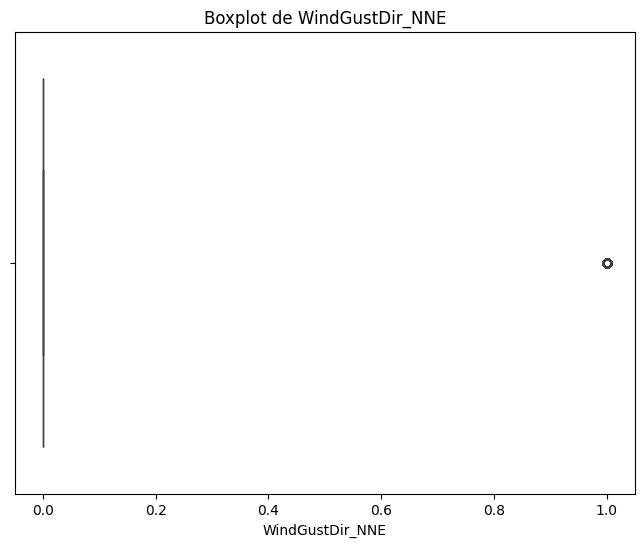

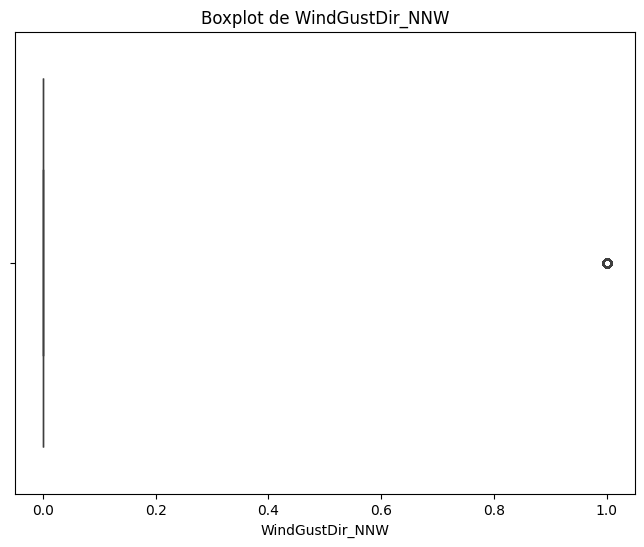

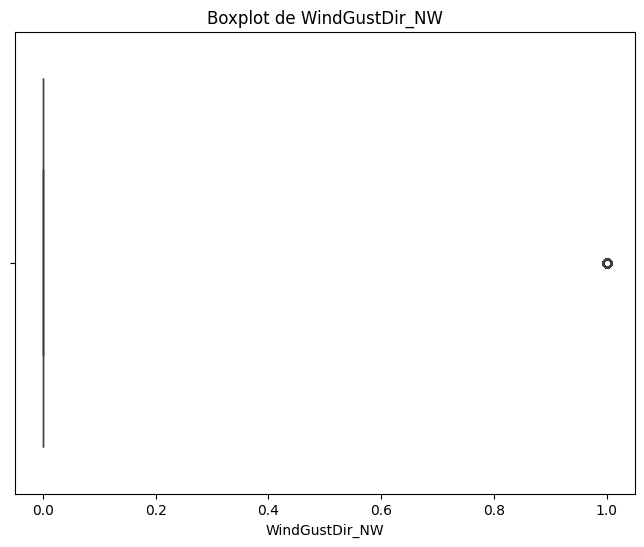

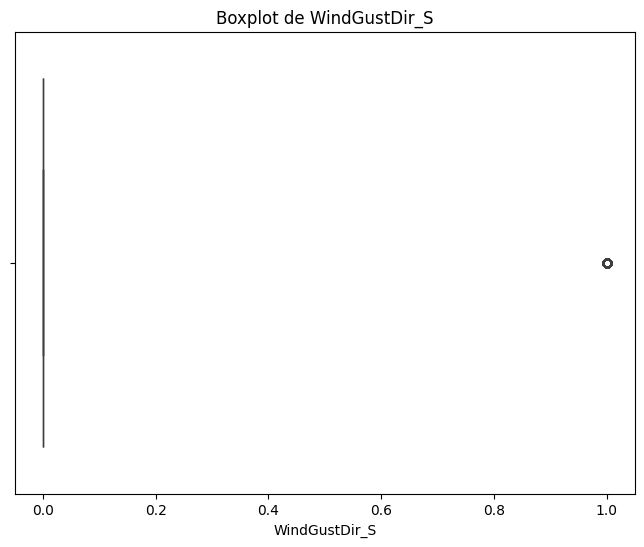

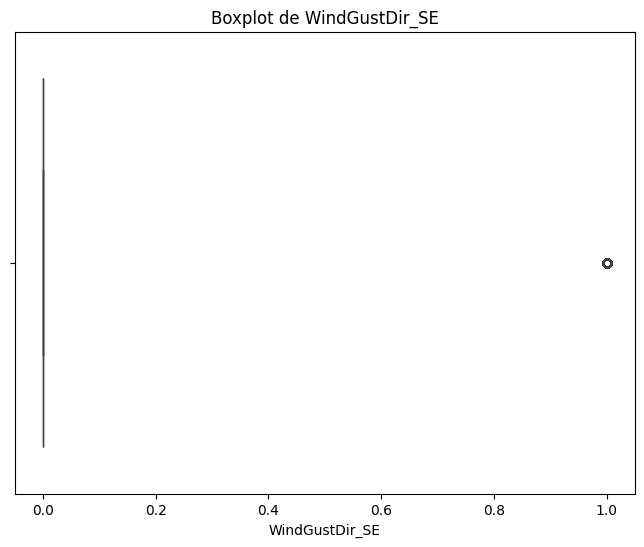

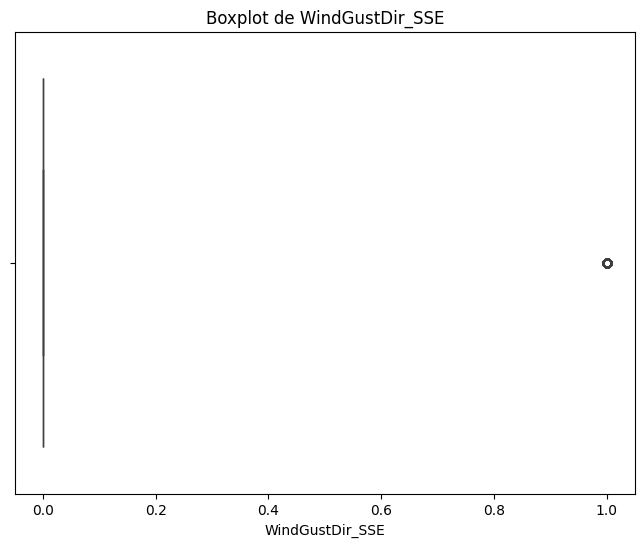

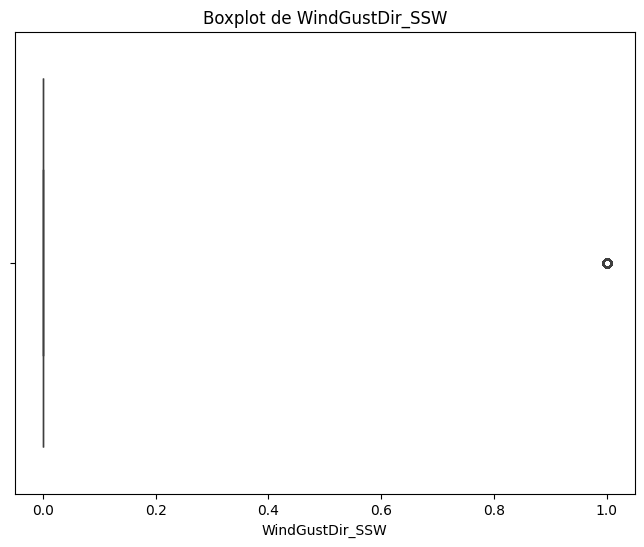

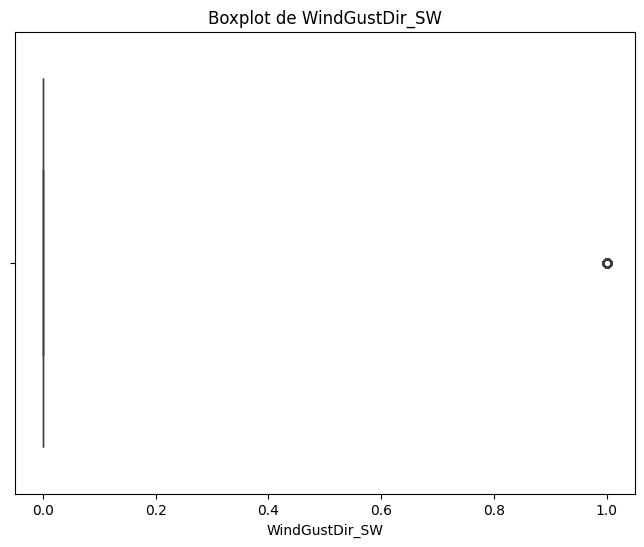

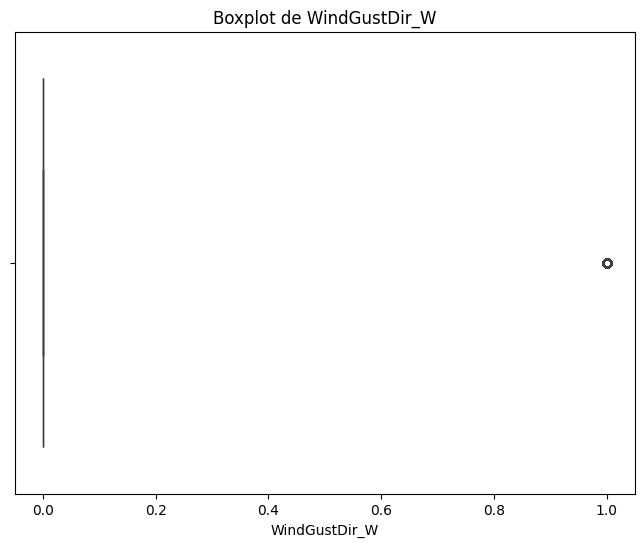

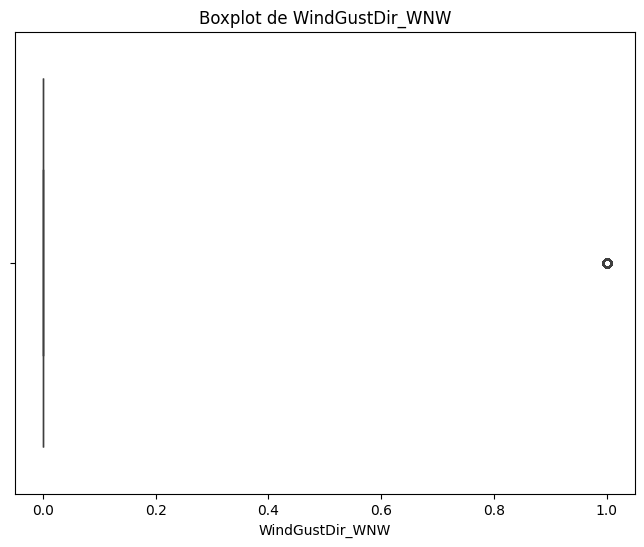

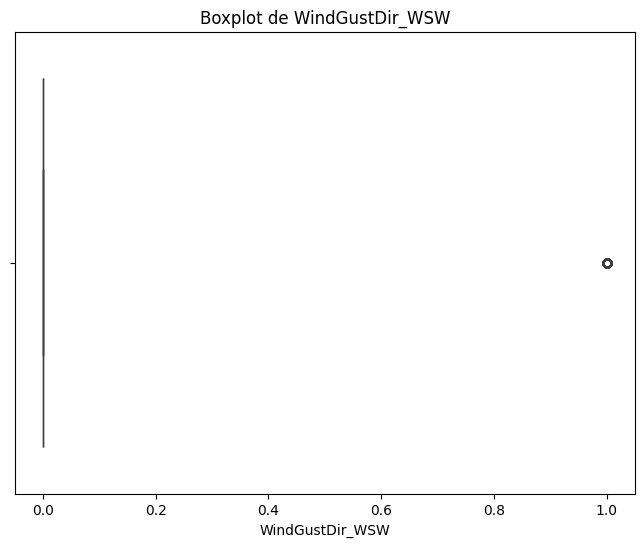

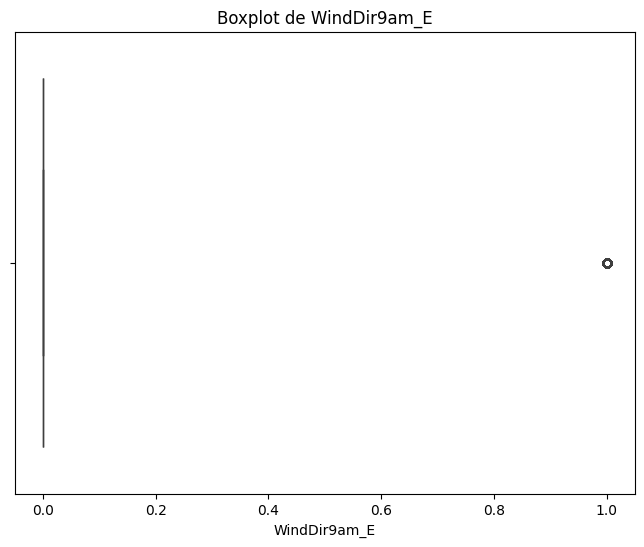

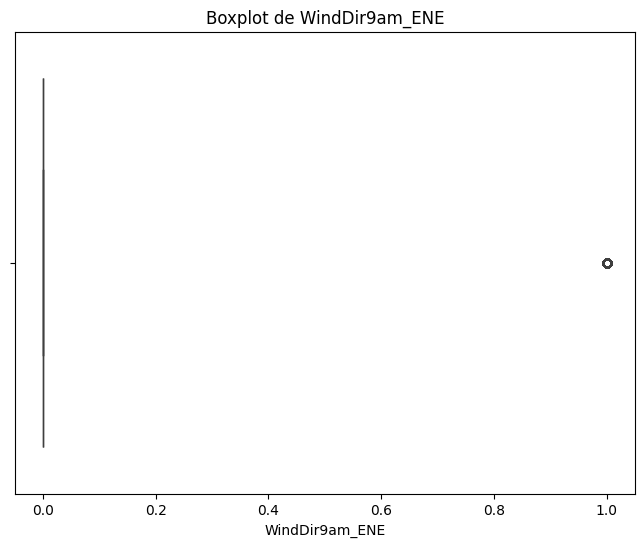

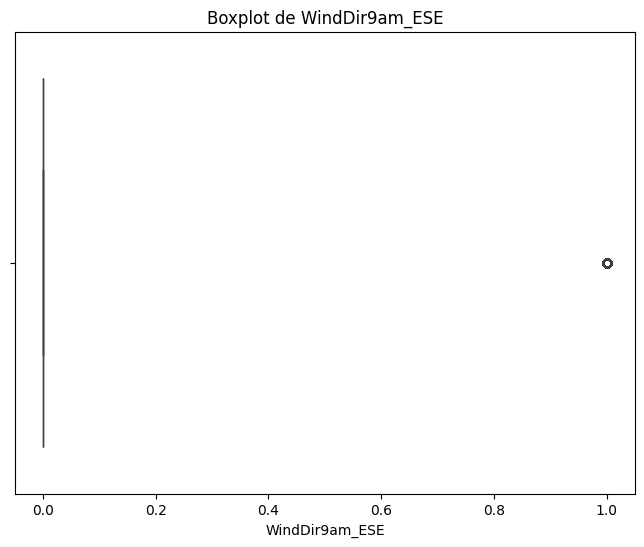

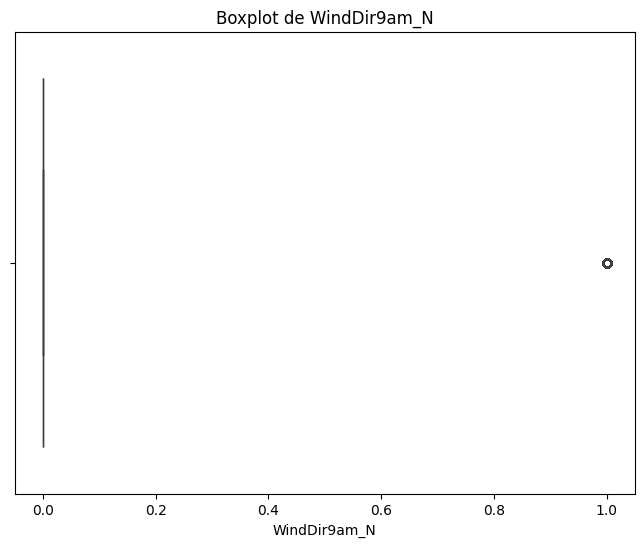

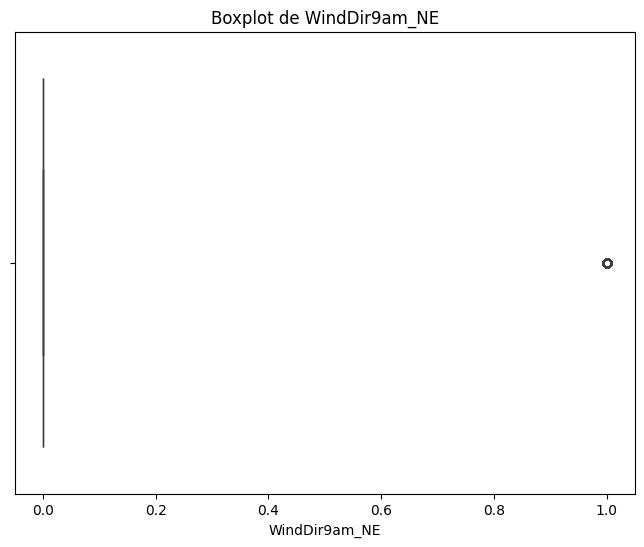

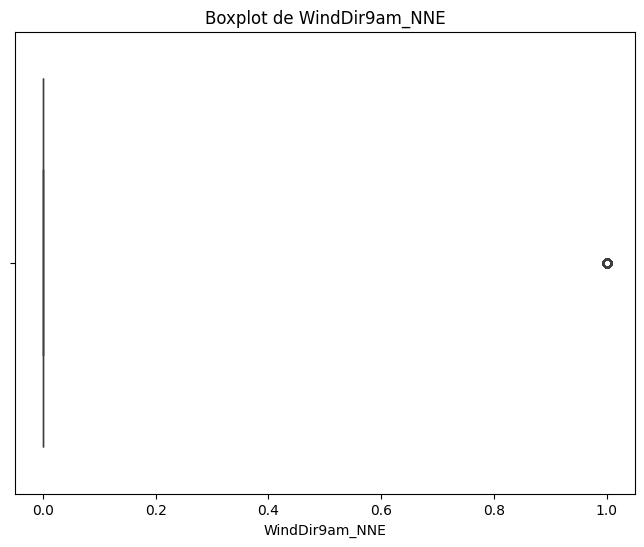

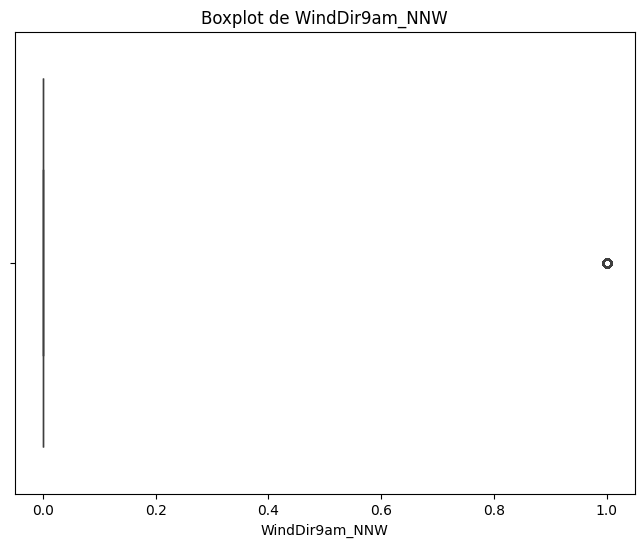

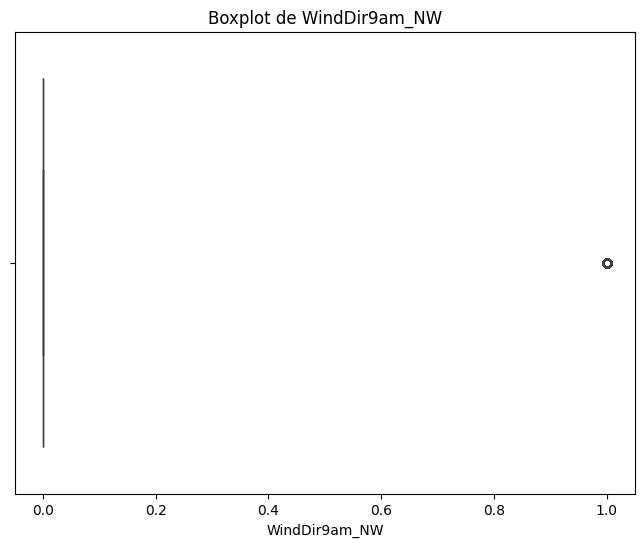

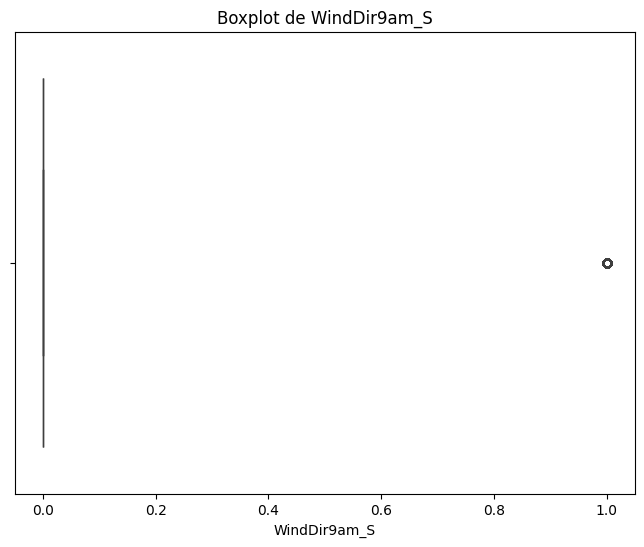

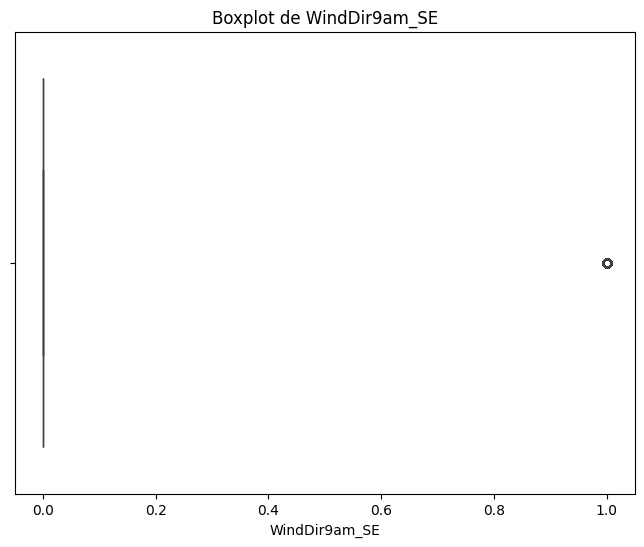

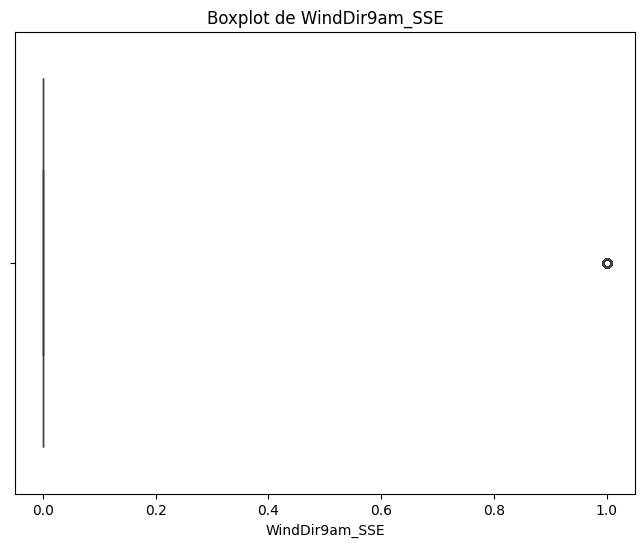

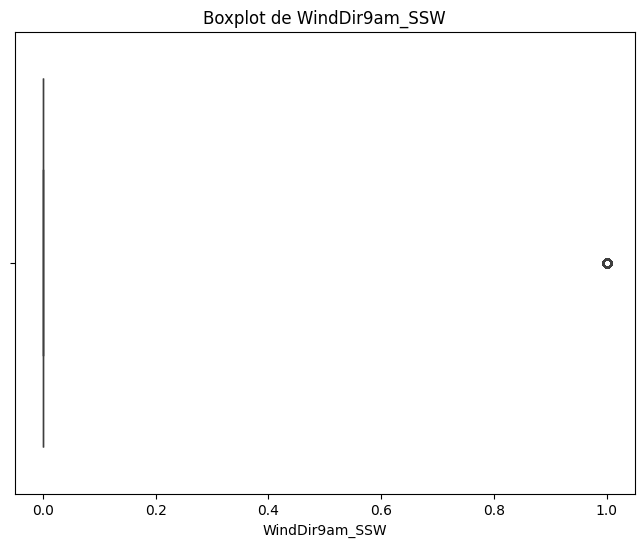

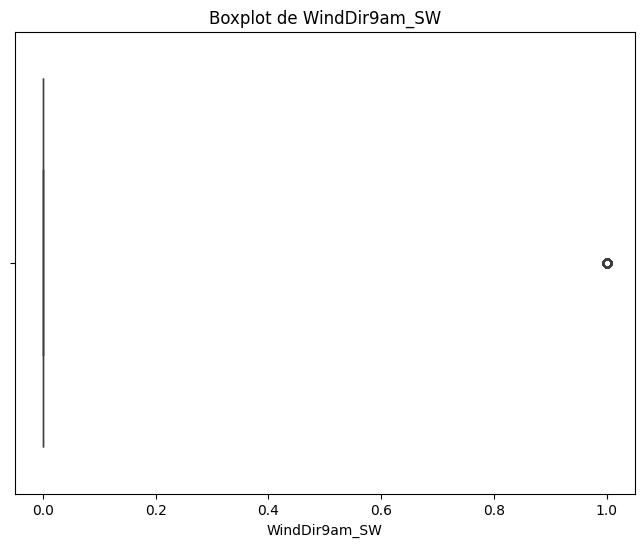

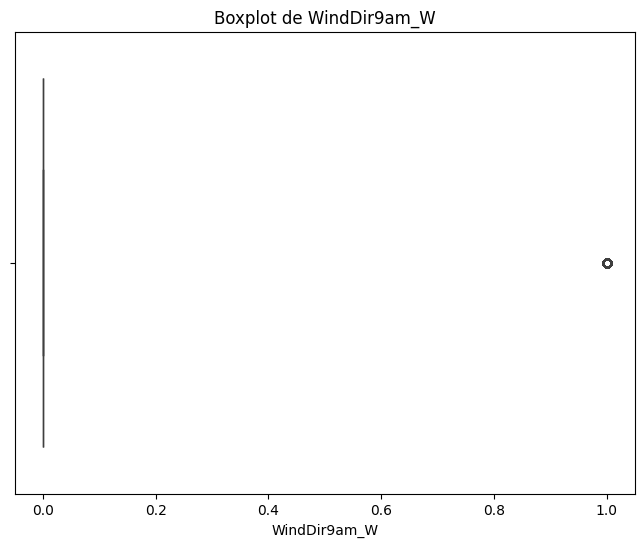

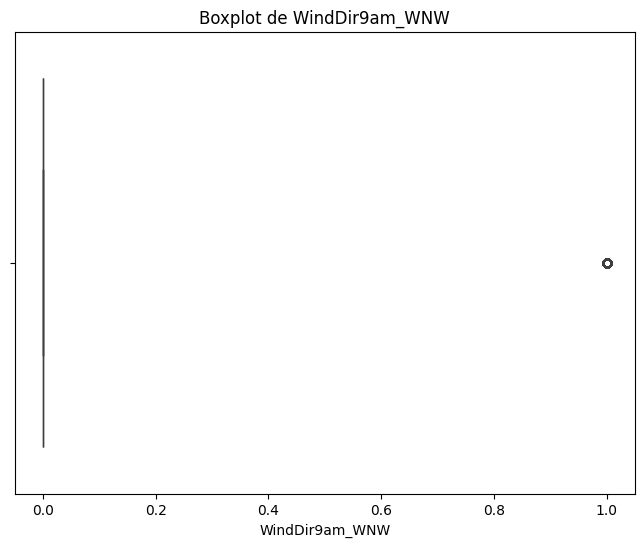

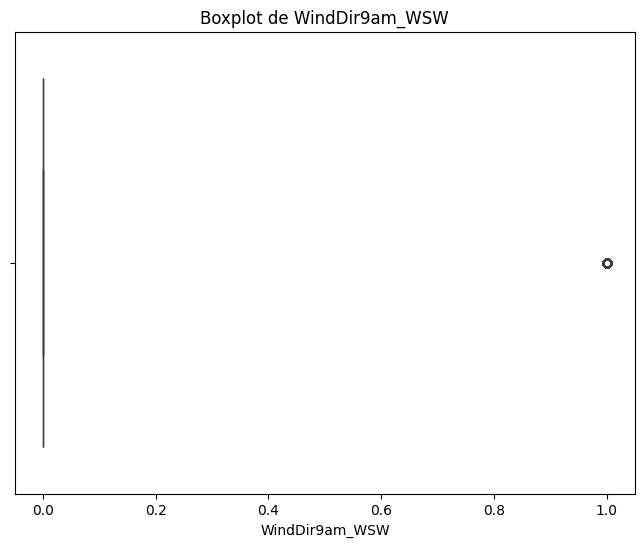

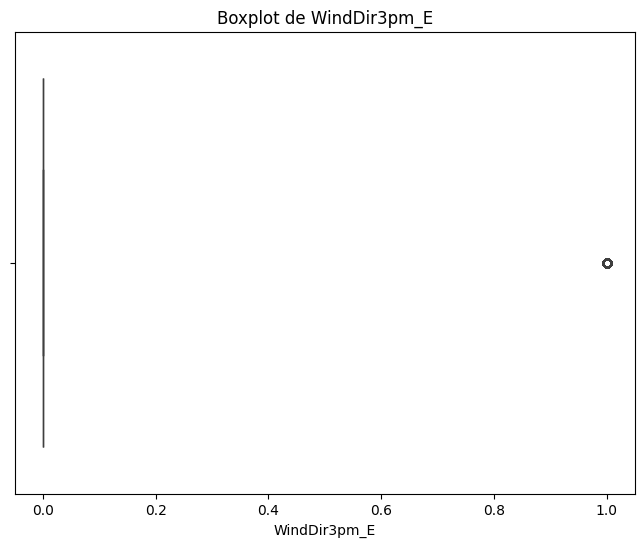

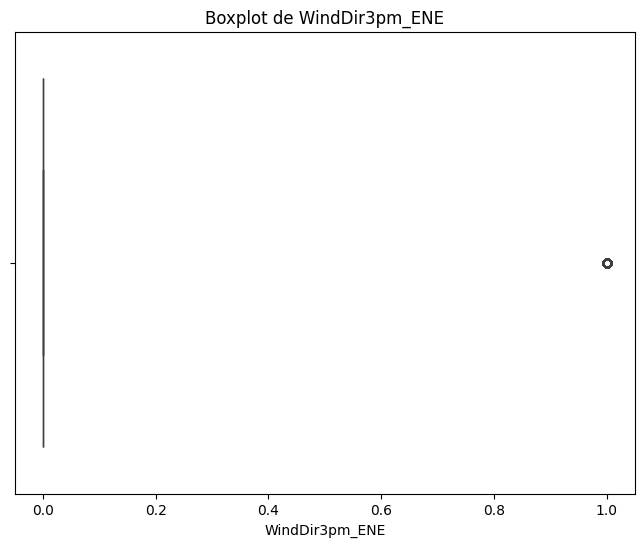

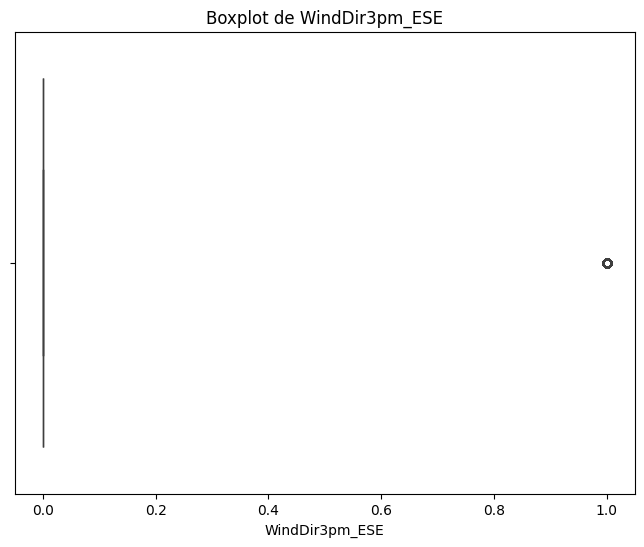

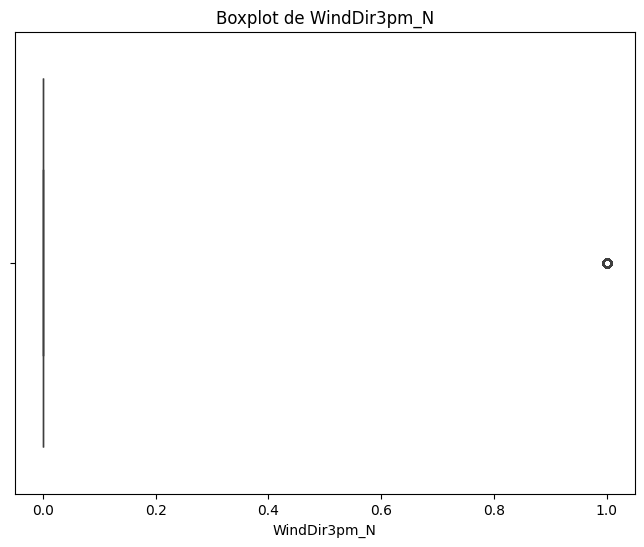

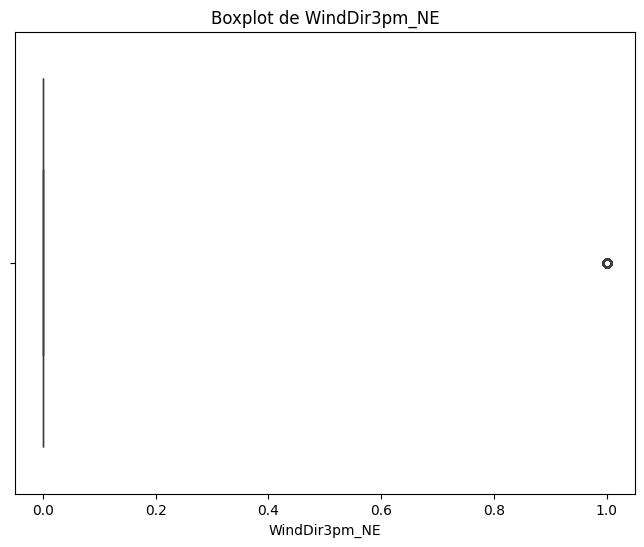

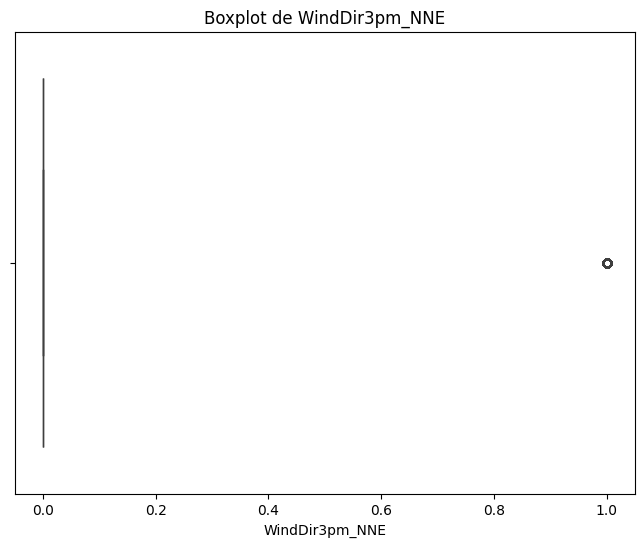

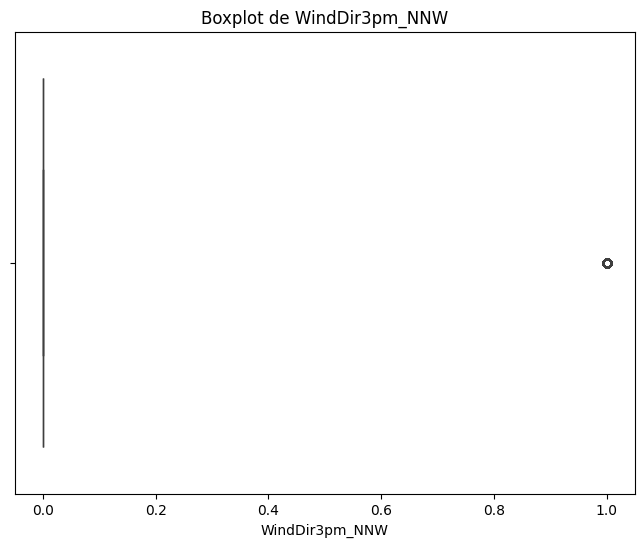

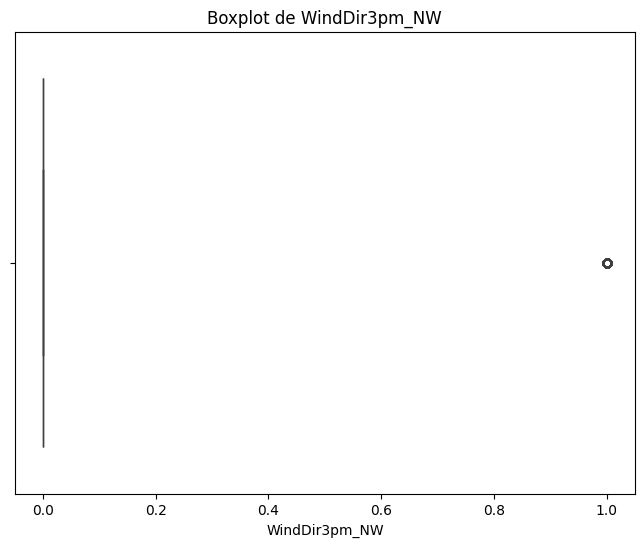

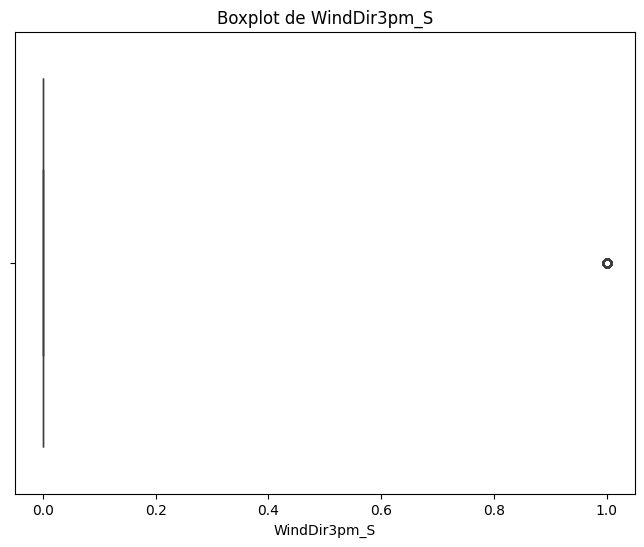

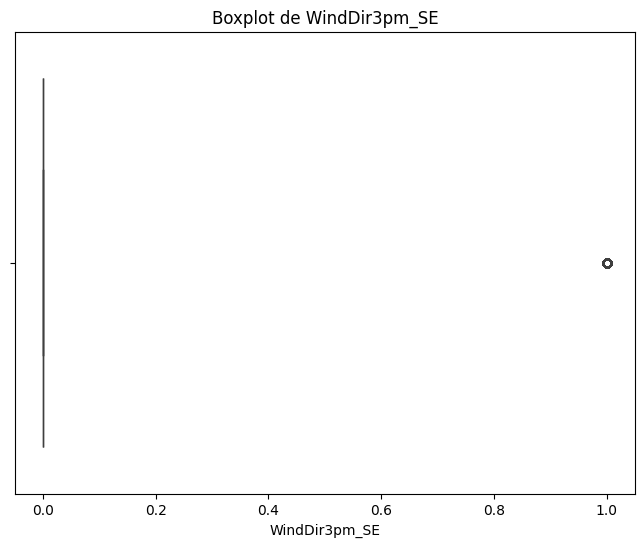

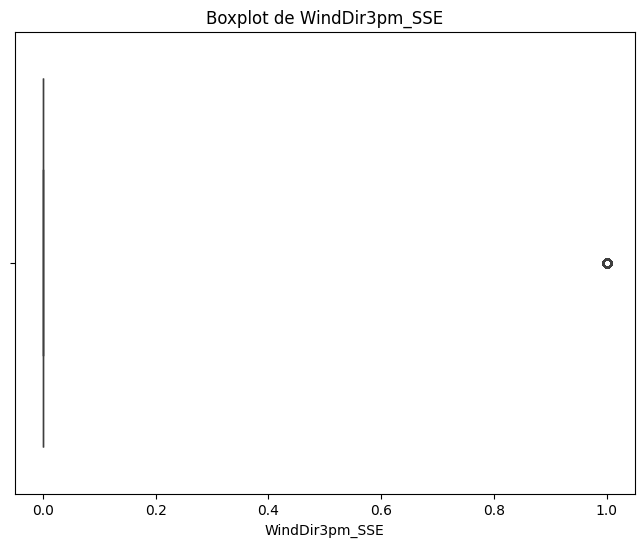

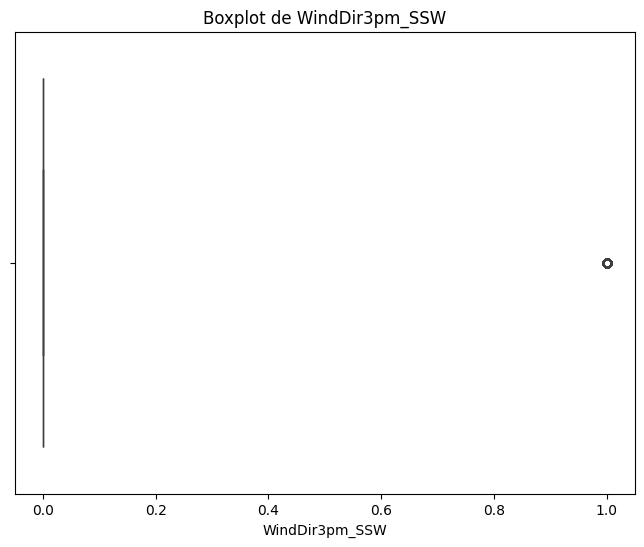

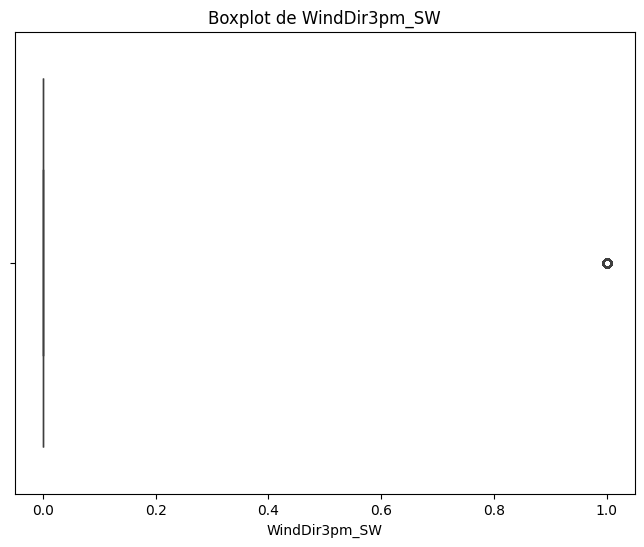

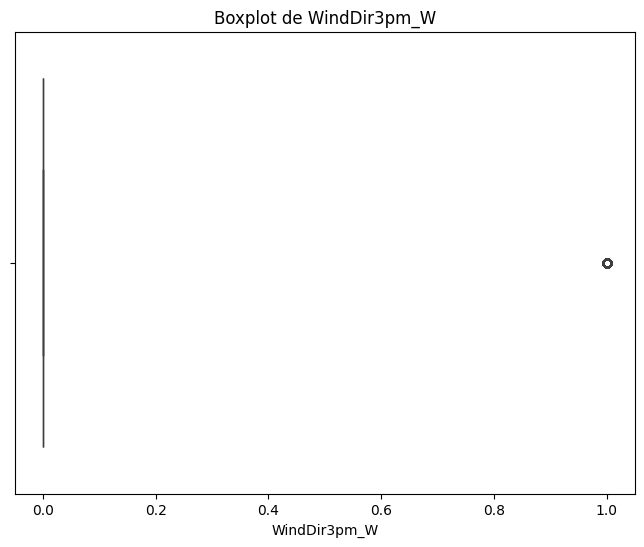

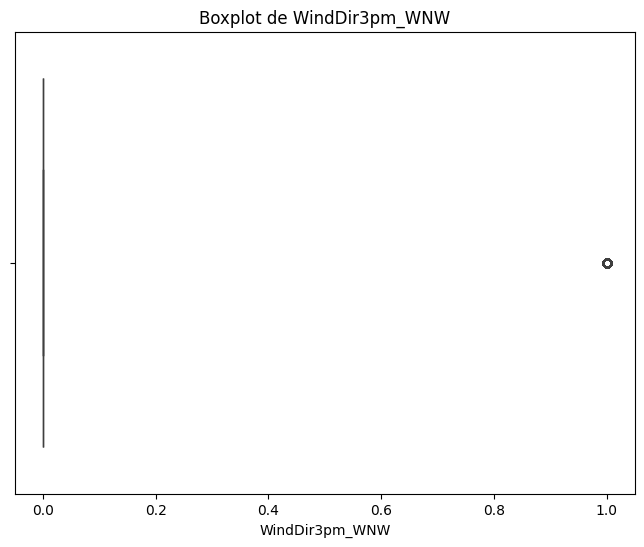

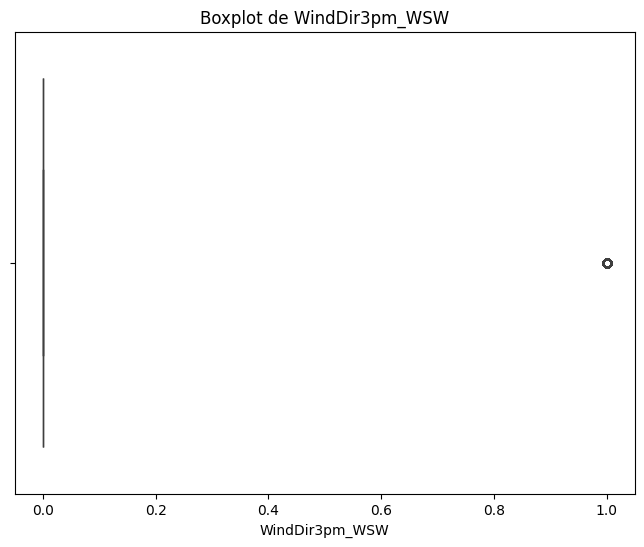

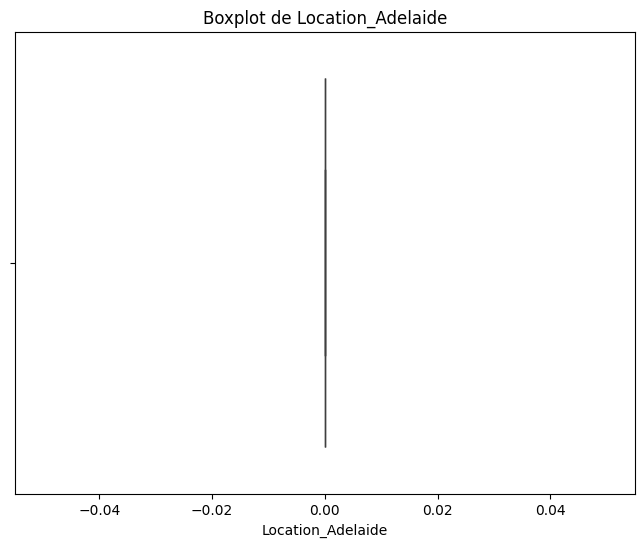

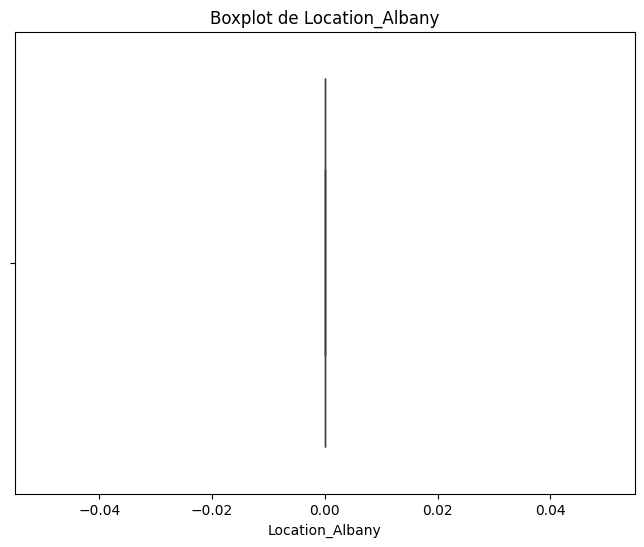

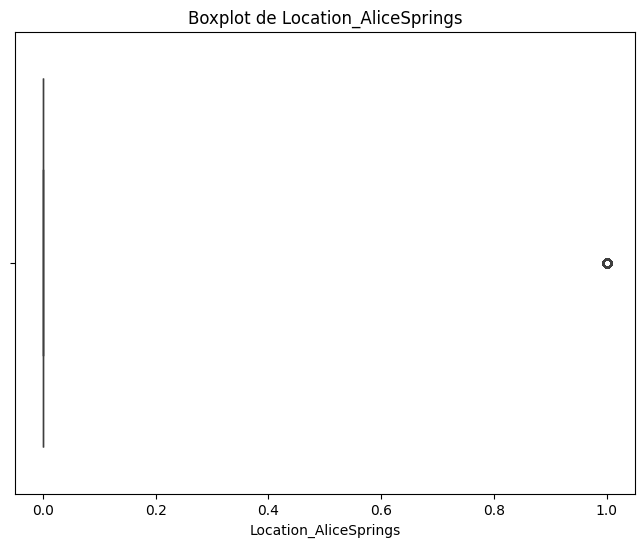

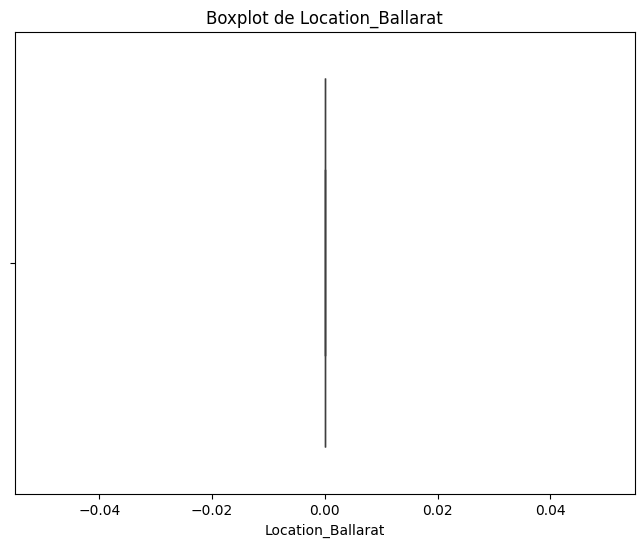

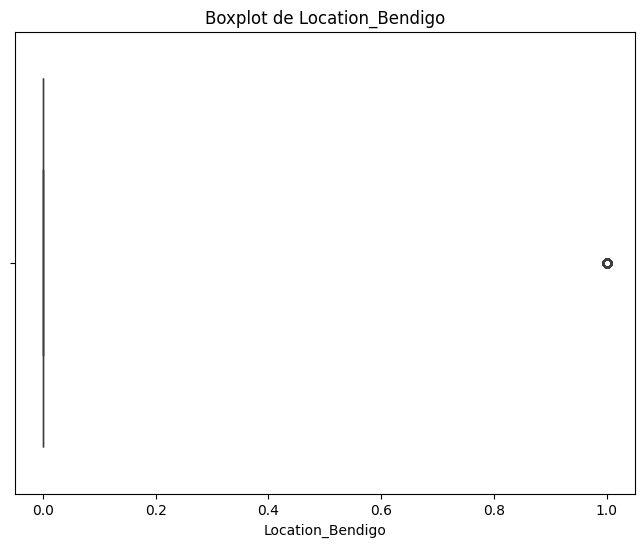

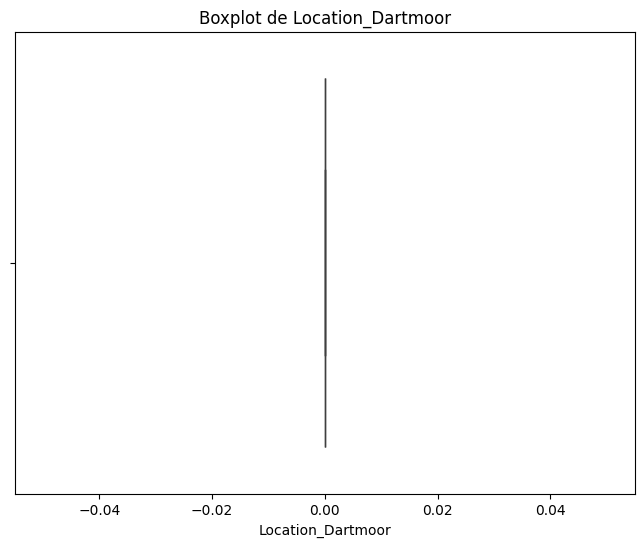

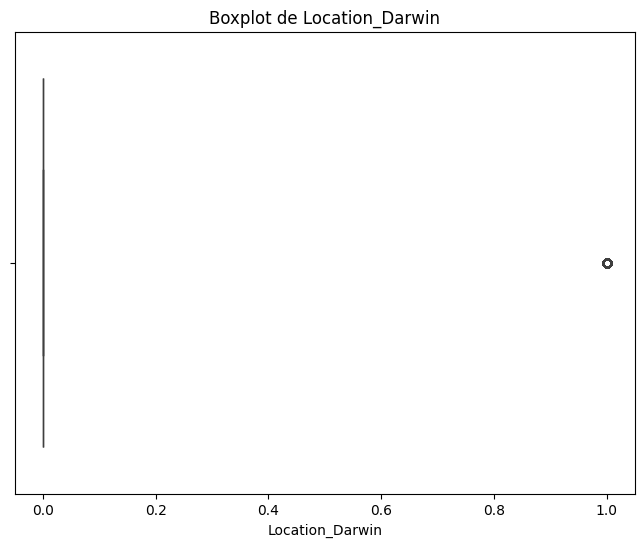

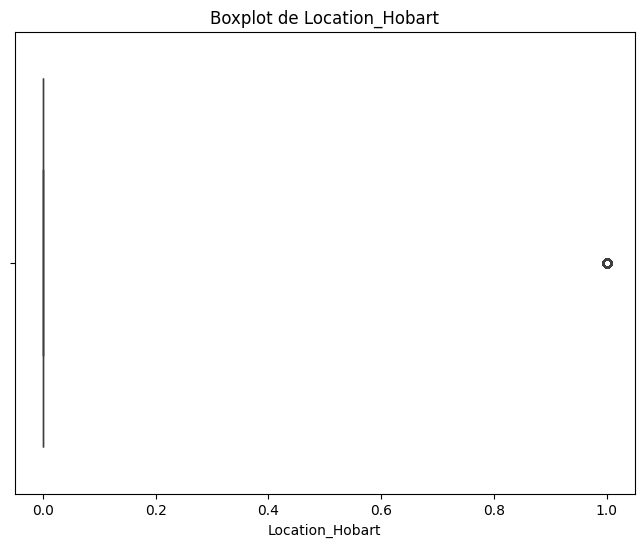

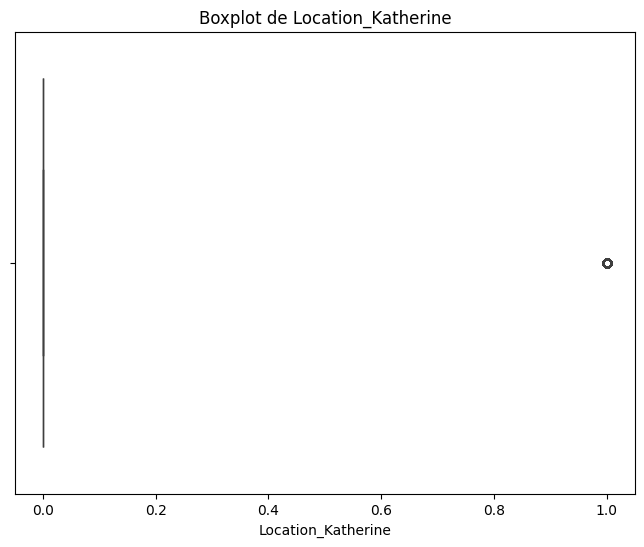

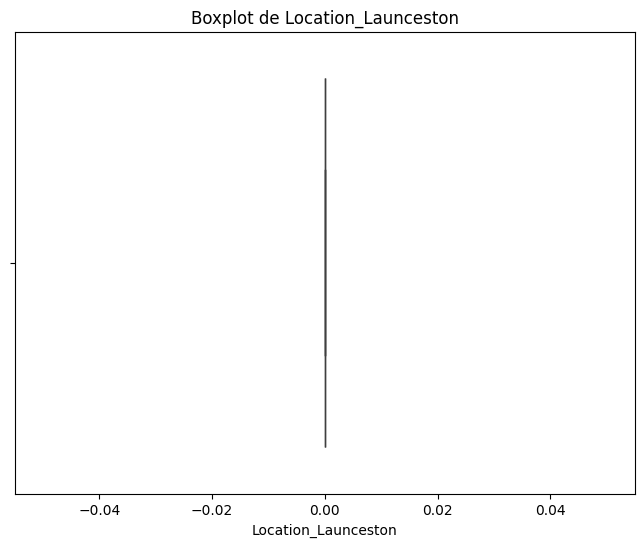

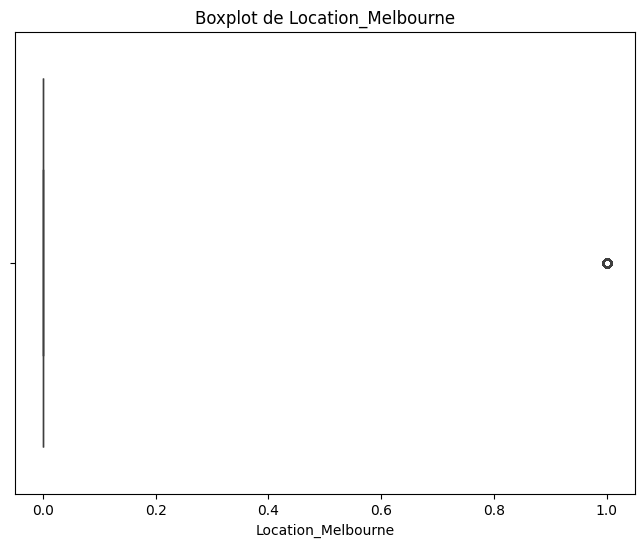

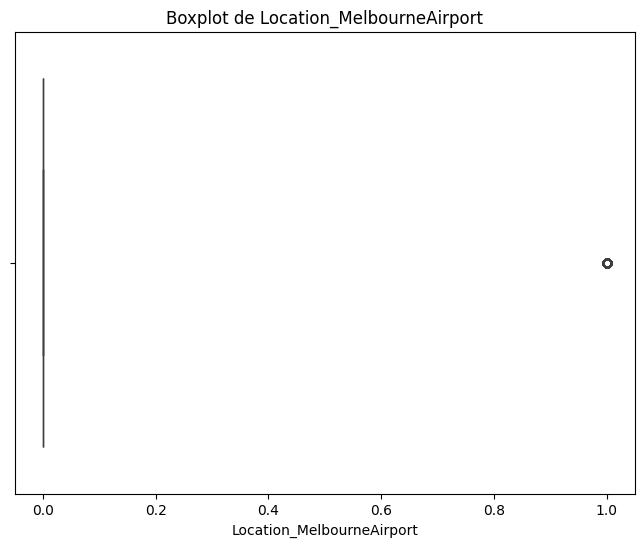

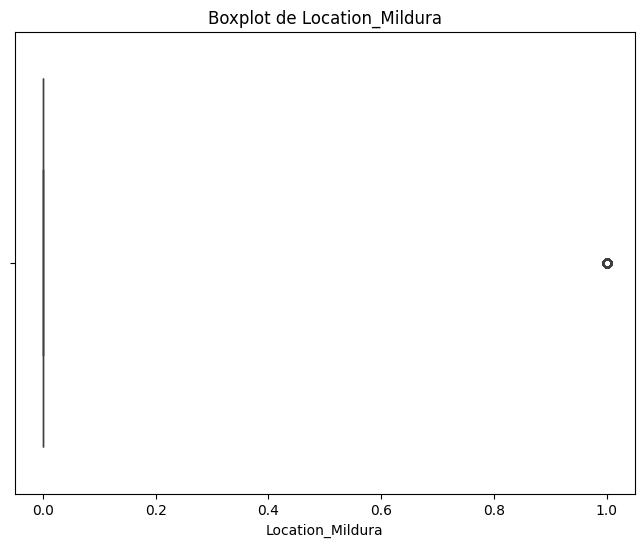

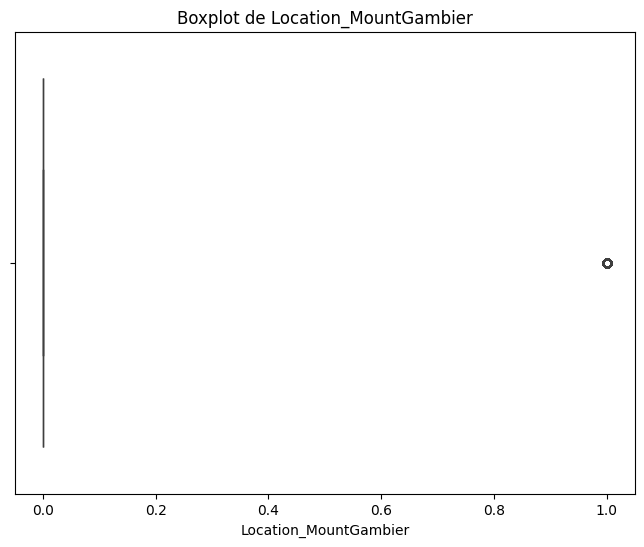

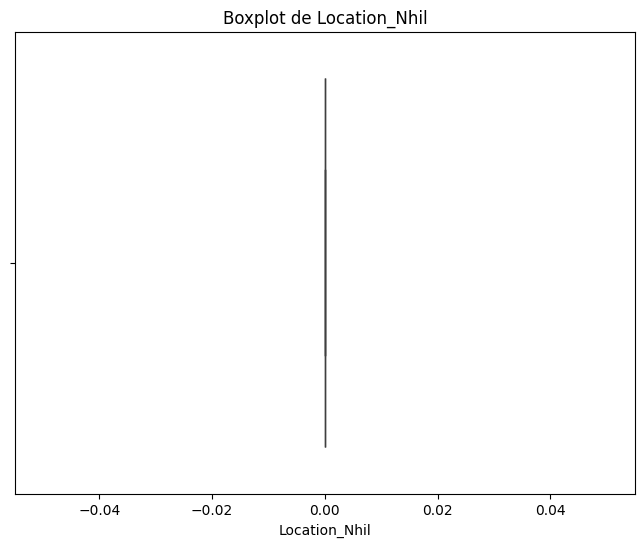

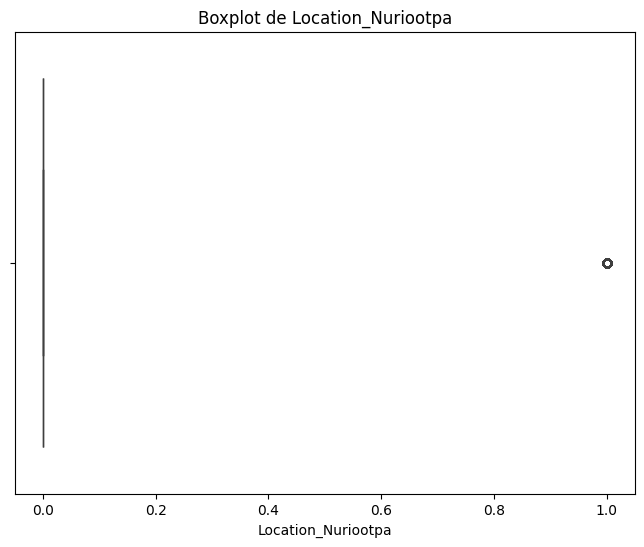

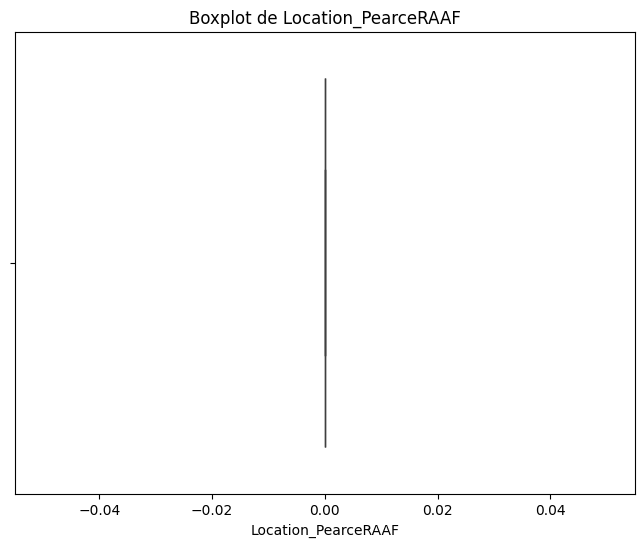

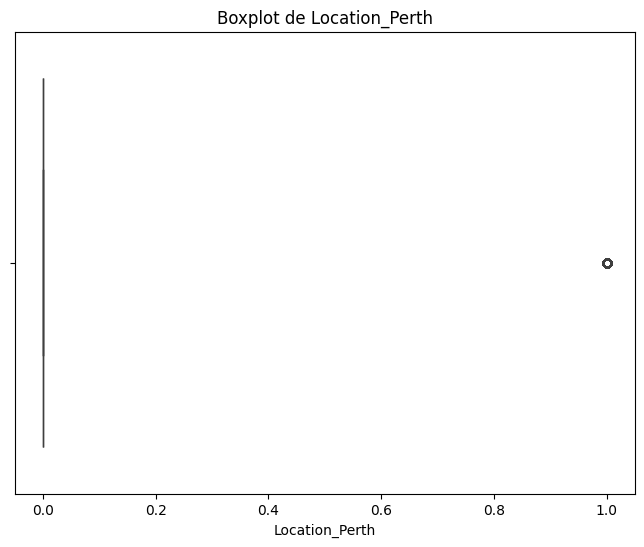

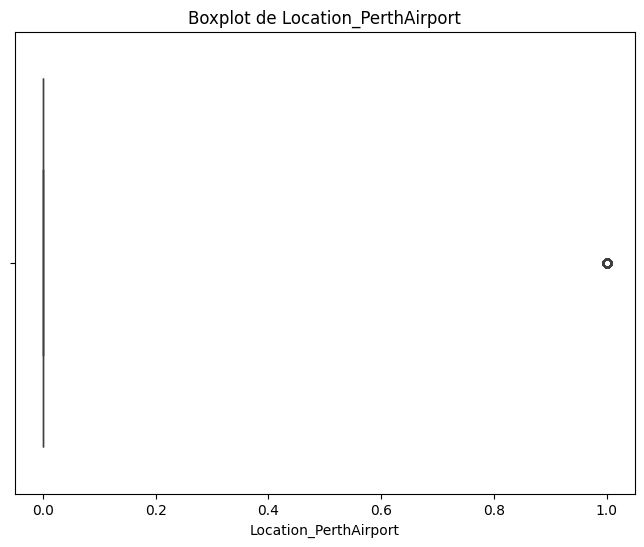

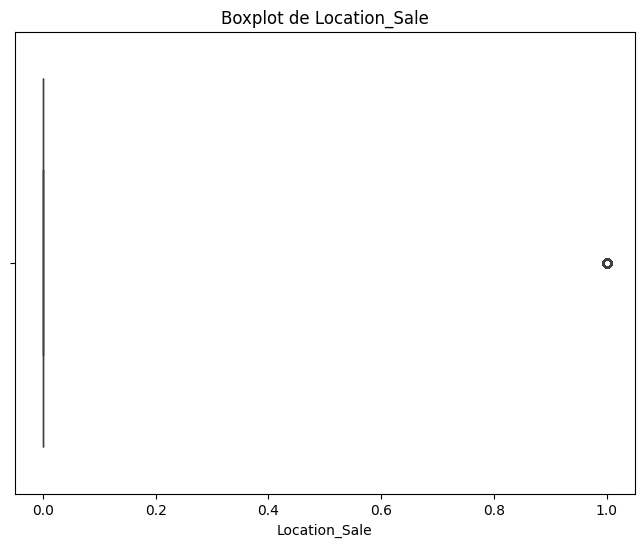

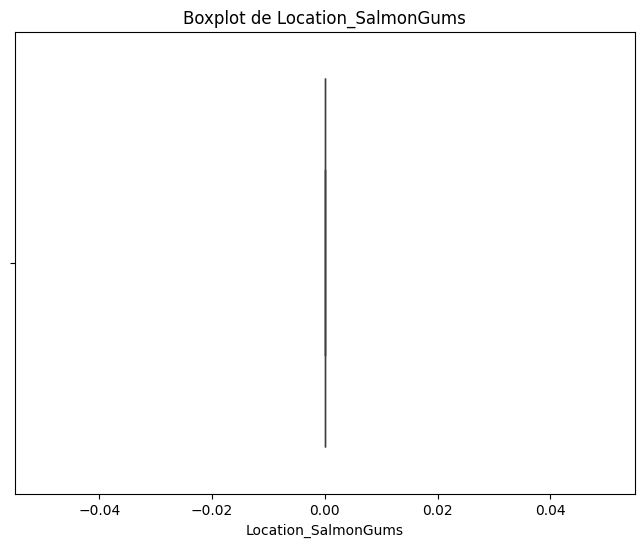

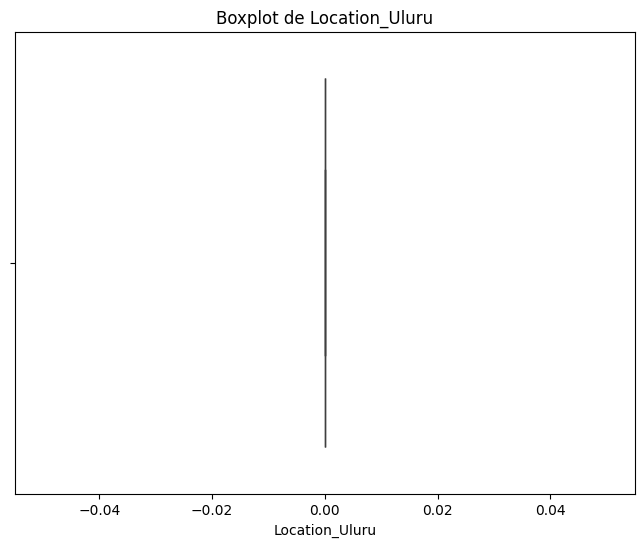

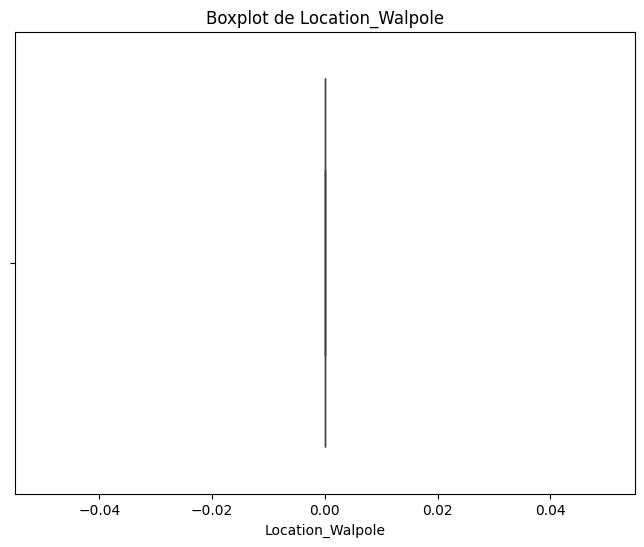

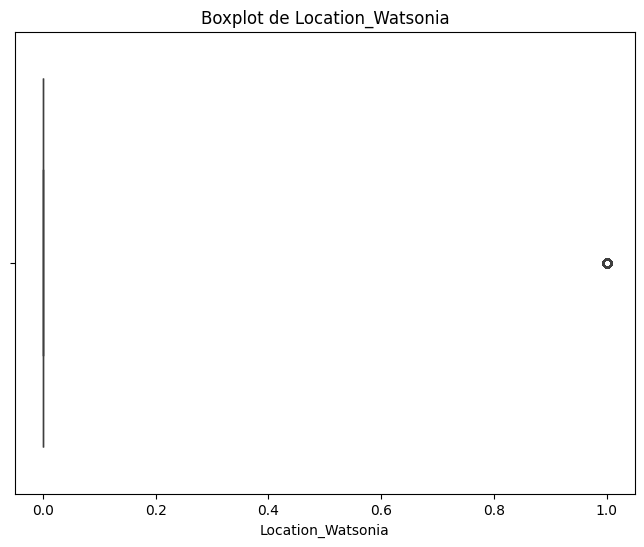

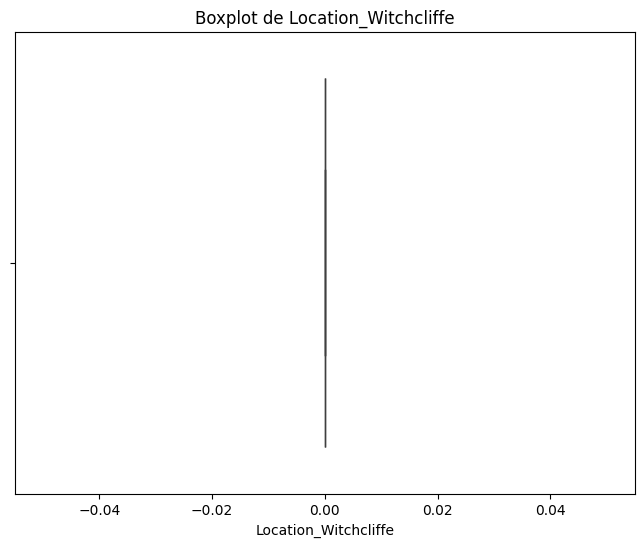

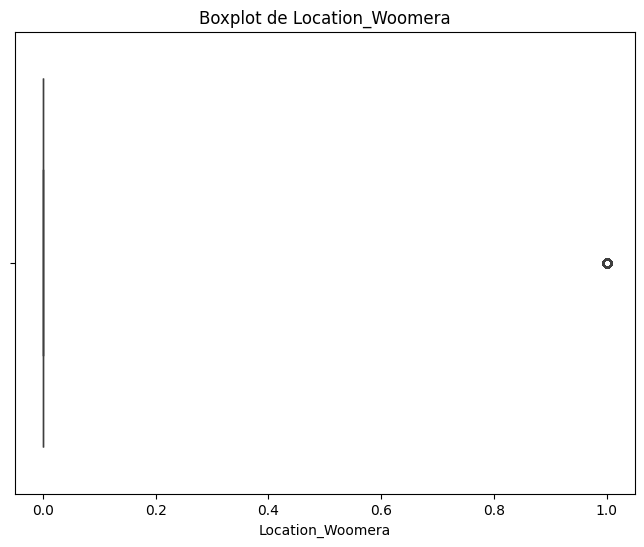

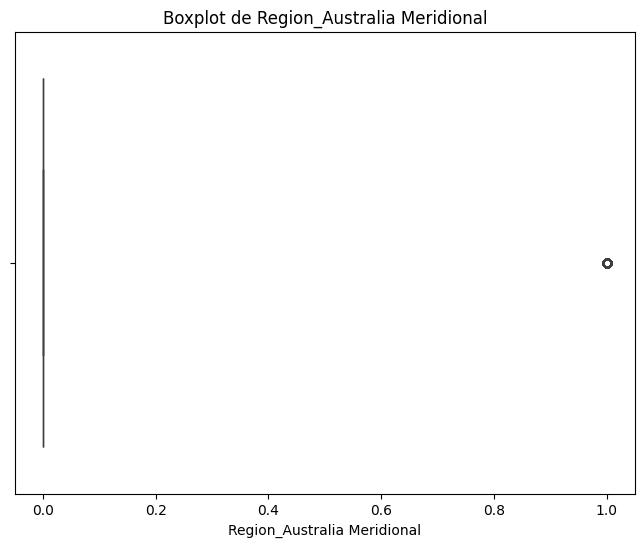

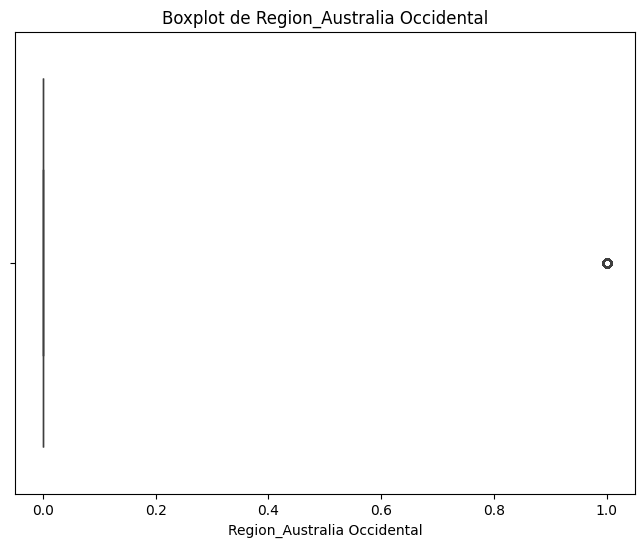

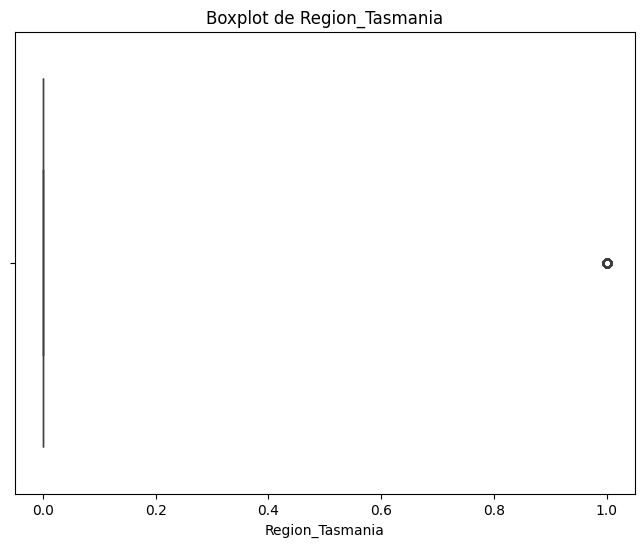

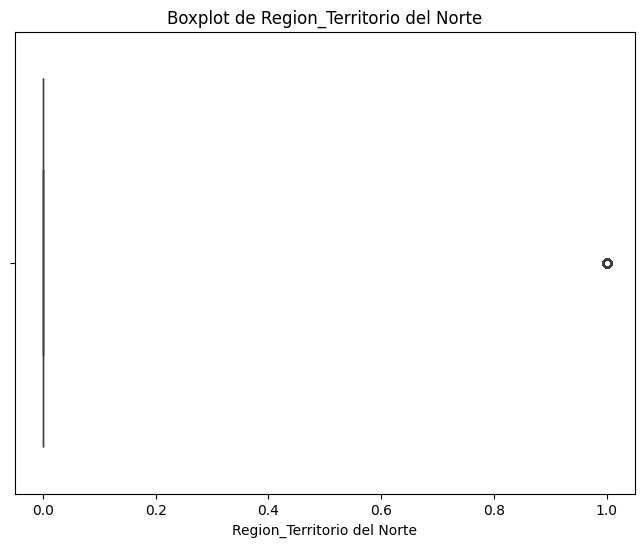

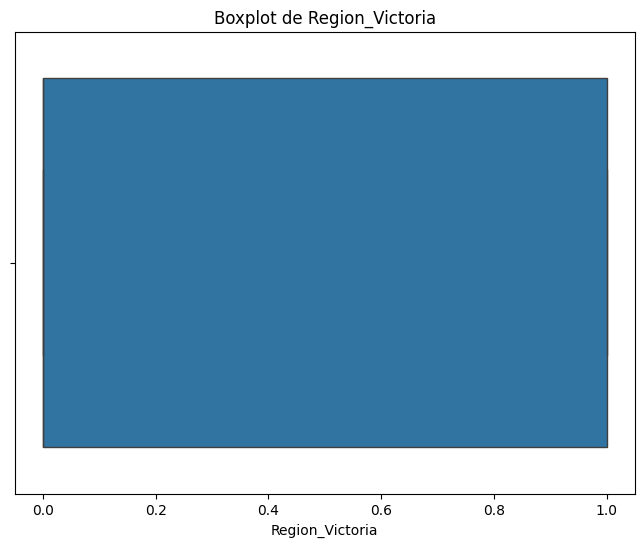

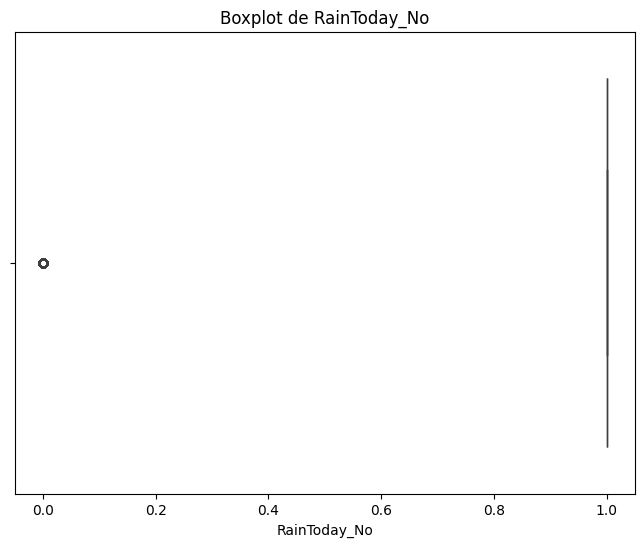

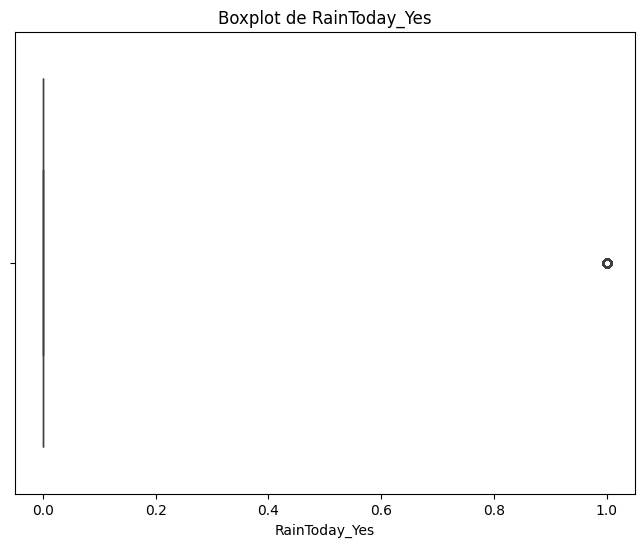

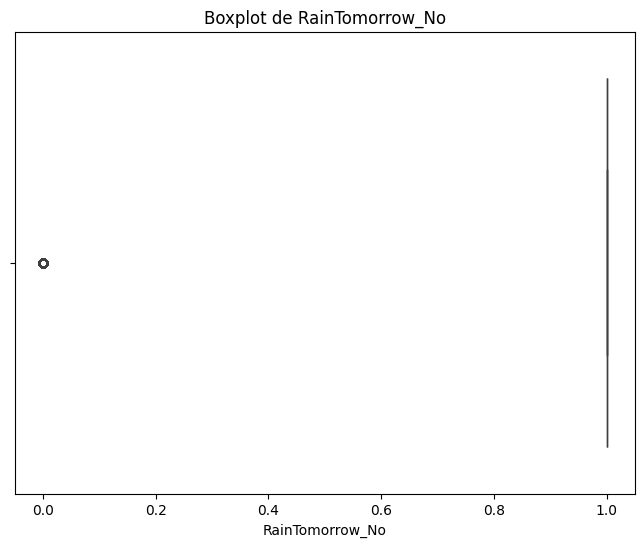

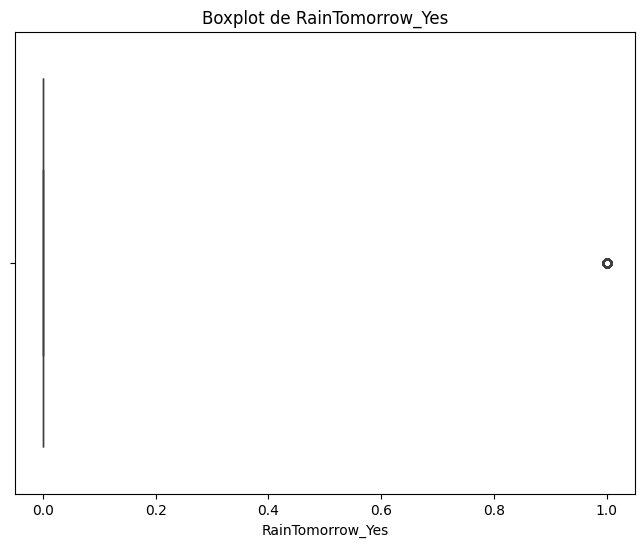

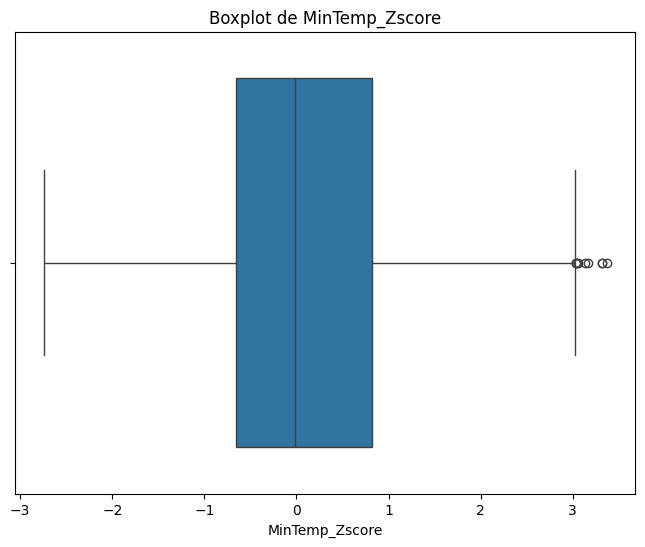

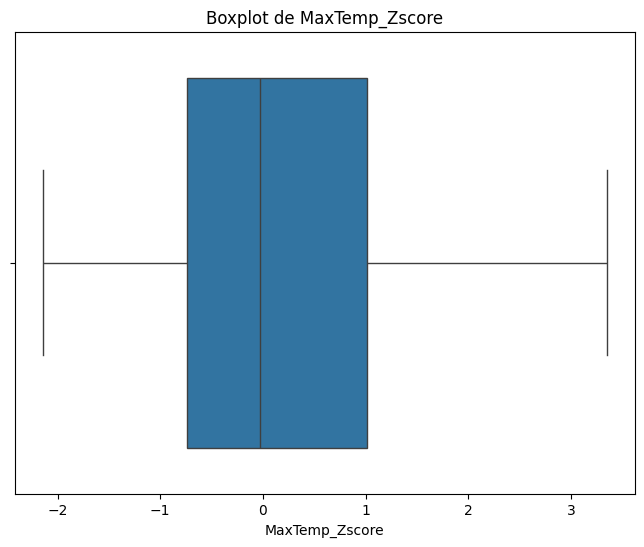

In [33]:
# Boxplot de cada columna por separado del dataSet_no_nan
for column in dataSetno_nan.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=dataSetno_nan[column])
  plt.title(f'Boxplot de {column}')
  plt.show()

In [34]:
# Borrar todos los outliers que quedan fuera de los boxplots de temperaturas, lluvia, nubes, humedad, presión

# Seleccionar las columnas a analizar para outliers
columns_to_analyze = ['MinTemp', 'MaxTemp', 'Temp3pm', 'Temp9am', 'WindGustSpeed',
                                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                'Evaporation', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                                'Cloud3pm', 'Sunshine', 'Rainfall', 'Evaporation']
dataSet_no_outliers = dataSetno_nan.copy()

for column in columns_to_analyze:
  # Calcular el rango intercuartílico (IQR)
  Q1 = dataSet_no_outliers[column].quantile(0.25)
  Q3 = dataSet_no_outliers[column].quantile(0.75)
  IQR = Q3 - Q1

  # Limites para identificar outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Eliminar las filas con valores fuera de los límites
  dataSet_no_outliers = dataSet_no_outliers[
      (dataSet_no_outliers[column] >= lower_bound) & (dataSet_no_outliers[column] <= upper_bound)
  ]

print(f"Tamaño del dataset sin outliers: {dataSet_no_outliers.shape}")
dataSetno_nan = dataSet_no_outliers.copy()

Tamaño del dataset sin outliers: (26342, 102)


dado lo investigado en internet:
- el rainfall rara vez es mayor a 100mm (solo pasa en Territorio del norte)
- la velocidad de viento maxima es de 110km/h especialmente en australia occiodental
- dado que hay regiones con mas altura que otras, las presiones atmosfericas se encuentran entre 990 y 1030 atm

In [35]:
# Eliminar filas con rainfall mayor a 110
dataSetno_nan = dataSetno_nan[dataSetno_nan['Rainfall'] <= 110]

# Eliminar filas con velocidad de viento mayor a 110
dataSetno_nan = dataSetno_nan[dataSetno_nan['WindGustSpeed'] <= 110]

# Eliminar filas con presión fuera del rango 990 y 1030
dataSetno_nan = dataSetno_nan[(dataSetno_nan['Pressure9am'] >= 990) & (dataSetno_nan['Pressure9am'] <= 1030)]
dataSetno_nan = dataSetno_nan[(dataSetno_nan['Pressure3pm'] >= 990) & (dataSetno_nan['Pressure3pm'] <= 1030)]

print(f"Tamaño del dataset sin NaN y outliers: {dataSetno_nan.shape}")

Tamaño del dataset sin NaN y outliers: (25050, 102)


Cantidad de outliers encontrados: 1253


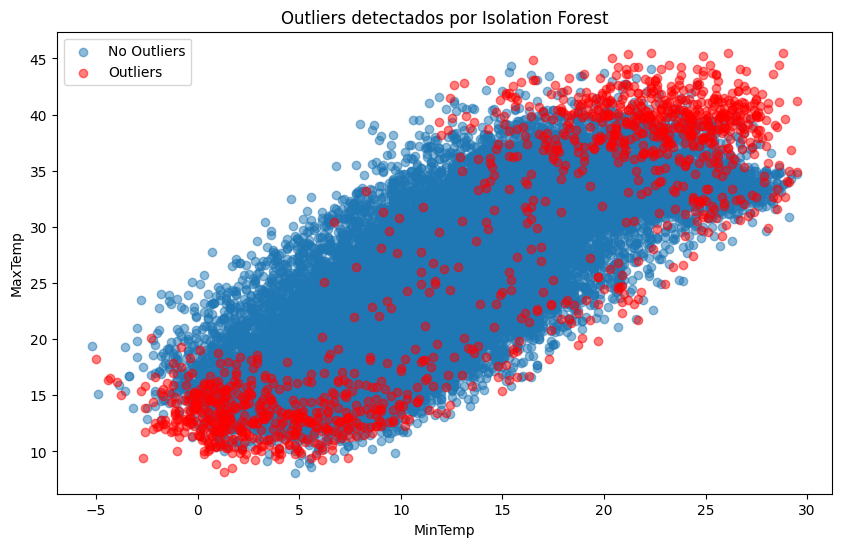

In [36]:
# Isolation Forest de las columnas de temperaturas, velocidad de vientos, humedad, evaporación, presión, nubes y sunshine para eliminar outliers del dataSet_no_nan.

columns_for_isolation_forest = ['MinTemp', 'MaxTemp', 'Temp3pm', 'Temp9am', 'WindGustSpeed',
                                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                'Evaporation', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                                'Cloud3pm', 'Sunshine']

# Crear el modelo
model = IsolationForest(n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=15,
    bootstrap=False,
    n_jobs=-1,
    random_state=1,)

# Entrenar el modelo con las columnas seleccionadas
model.fit(dataSetno_nan[columns_for_isolation_forest])

# Predecir los outliers
outlier_predictions = model.predict(dataSetno_nan[columns_for_isolation_forest])

# Identificar las filas con outliers
outlier_rows = dataSetno_nan[outlier_predictions == -1]

# Imprimir la cantidad de outliers encontrados
print(f"Cantidad de outliers encontrados: {len(outlier_rows)}")

# Eliminar las filas con outliers del dataset
dataSetno_nan_no_outliers = dataSetno_nan[outlier_predictions == 1]

# Crear un gráfico de dispersión mostrando outliers
plt.figure(figsize=(10, 6))
plt.scatter(dataSetno_nan_no_outliers['MinTemp'], dataSetno_nan_no_outliers['MaxTemp'],
            label='No Outliers', alpha=0.5)
plt.scatter(outlier_rows['MinTemp'], outlier_rows['MaxTemp'], color='red',
            label='Outliers', alpha=0.5)
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.title('Outliers detectados por Isolation Forest')
plt.legend()
plt.show()

Cantidad de outliers encontrados por LOF: 1190


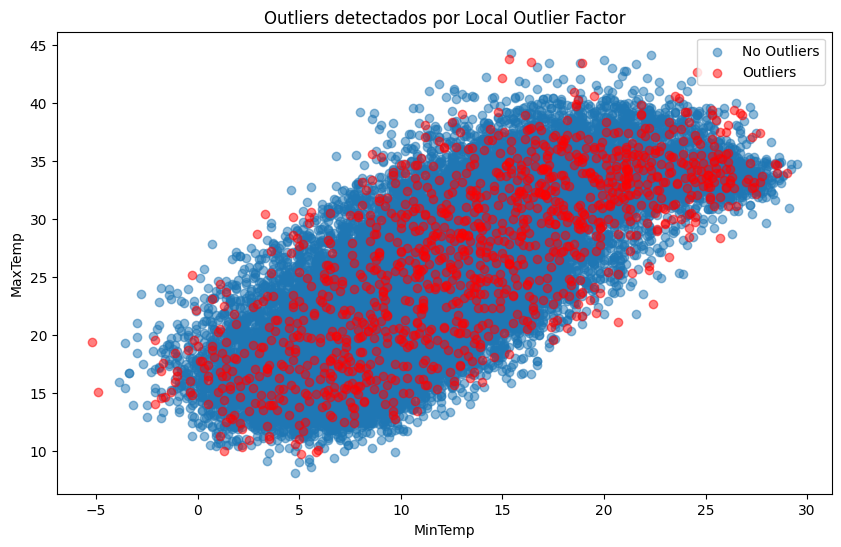

In [37]:
# Local Outlier Factor
columns_for_lof = ['MinTemp', 'MaxTemp', 'Temp3pm', 'Temp9am', 'WindGustSpeed',
                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                  'Evaporation', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                  'Cloud3pm', 'Sunshine']

# Crear el modelo Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Entrenar el modelo con las columnas seleccionadas
y_pred = lof.fit_predict(dataSetno_nan_no_outliers[columns_for_lof])

# Identificar las filas con outliers
outlier_rows_lof = dataSetno_nan_no_outliers[y_pred == -1]

# Imprimir la cantidad de outliers encontrados
print(f"Cantidad de outliers encontrados por LOF: {len(outlier_rows_lof)}")

# Eliminar las filas con outliers del dataset
dataSetno_nan_no_outliers_no_lof = dataSetno_nan_no_outliers[y_pred == 1]

# Crear un gráfico de dispersión mostrando outliers
plt.figure(figsize=(10, 6))
plt.scatter(dataSetno_nan_no_outliers_no_lof['MinTemp'], dataSetno_nan_no_outliers_no_lof['MaxTemp'],
            label='No Outliers', alpha=0.5)
plt.scatter(outlier_rows_lof['MinTemp'], outlier_rows_lof['MaxTemp'], color='red',
            label='Outliers', alpha=0.5)
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.title('Outliers detectados por Local Outlier Factor')
plt.legend()
plt.show()

###B

In [45]:
# DataSet limpiado
dataSetno_nan_no_outliers_no_lof.shape

(22607, 102)

In [46]:
clean_dataSet = dataSetno_nan_no_outliers_no_lof.copy()

# Features a usar
features = ['MinTemp', 'MaxTemp', 'Temp3pm', 'Temp9am', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
            'WindSpeed9am', 'WindSpeed3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'WindGustDir_E',
            'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
            'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW',
            'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
            'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
            'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E',
            'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
            'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
            'WindDir3pm_WNW', 'WindDir3pm_WSW','Humidity9am', 'Humidity3pm', 'Region_Australia Meridional', 'Region_Australia Occidental',
                  'Region_Tasmania', 'Region_Territorio del Norte', 'Region_Victoria', 'RainToday_Yes', 'RainTomorrow_Yes']

# Columnas a eliminar
columns_to_remove = [col for col in clean_dataSet.columns if col not in features]
clean_dataSet = clean_dataSet.drop(columns=columns_to_remove)

# Mostrar las columnas que quedan y las que se sacaron
print("Columnas que quedan:")
print(clean_dataSet.columns.tolist())

print("\nColumnas que se sacaron:")
print(columns_to_remove)

Columnas que quedan:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'Wind

In [47]:
# Renombro columnas a RainToday y RainTomorrow
clean_dataSet = clean_dataSet.rename(columns={'RainToday_Yes': 'RainToday', 'RainTomorrow_Yes': 'RainTomorrow'})
print(clean_dataSet['RainTomorrow'].value_counts())

RainTomorrow
0    19776
1     2831
Name: count, dtype: int64


In [48]:
# hacer smote de clean_dataSet en los dataSets de prueba para aumentar los 1 en rainTomorrow

x = clean_dataSet.drop('RainTomorrow', axis=1)
y = clean_dataSet['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2, # 80/20
                                                    random_state=2)

# Aplico SMOTE solo en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print(y_train_resampled.value_counts())
x_train = x_train_resampled
y_train = y_train_resampled

RainTomorrow
0    15834
1    15834
Name: count, dtype: int64


### Modelo 1 : Árbol de decisión

In [49]:
param_grid = {
    'max_depth': [5, 10, 20, None],                 # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10, 20],            # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 8],               # Mínimo número de muestras en una hoja
    'max_features': [None, 'sqrt', 'log2'],         # Máximo número de características a considerar en cada nodo
    'criterion': ['gini', 'entropy'],               # Criterio de selección de las divisiones
    'splitter': ['best', 'random'],                 # Método de división: mejor división o aleatoria
    'class_weight': [None, 'balanced'],             # Ajuste del peso de clases para corregir desbalance
}

# creo y entreno el arbol de decision para maximizar la precision
tree = DecisionTreeClassifier(random_state=42)
tree_model = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10, scoring='f1', n_jobs=-1)
tree_model.fit(X = x_train, y = y_train)

print("Mejores hiperparámetros: ", tree_model.best_params_)

Mejores hiperparámetros:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


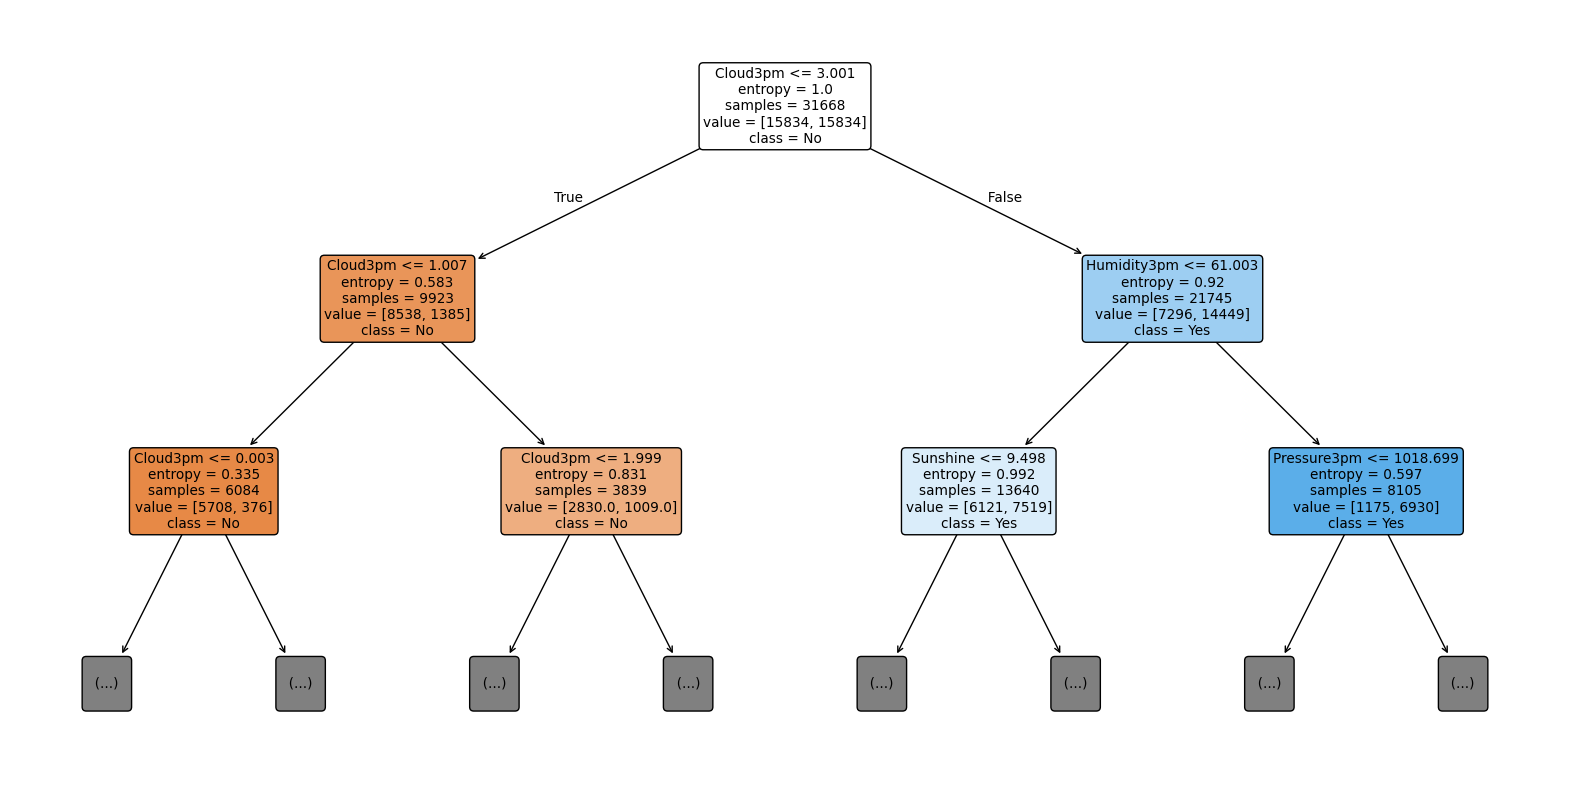

In [50]:
# Creo el grafico del mejor arbol
best_tree = tree_model.best_estimator_

plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=x_train.columns, class_names=['No', 'Yes'], rounded=True, max_depth=2)
plt.show()

y_pred = best_tree.predict(x_test)

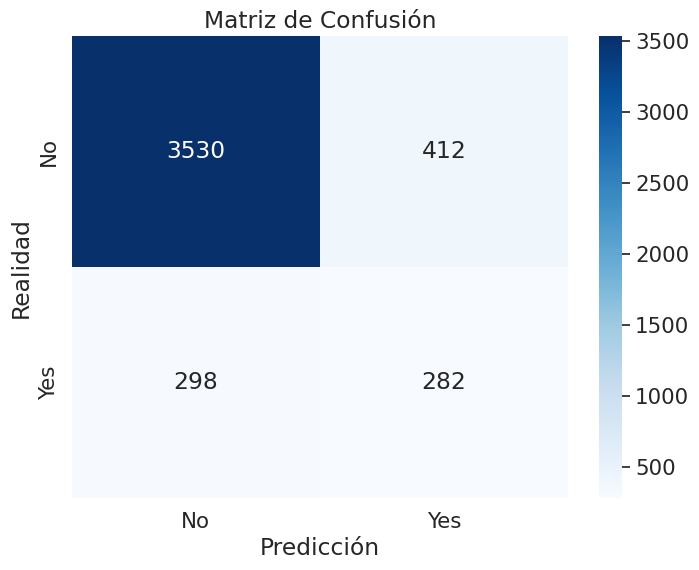

Precisión en el conjunto de prueba: 84.30%
Precisión en el conjunto de entrenamiento: 100.00%
Accuracy: 84.30%
Recall: 48.62%
Precision: 40.63%
F1 Score: 0.44


In [51]:
y_pred = best_tree.predict(x_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Metricas
accuracy = (y_pred == y_test).mean()
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

y_train_pred = best_tree.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("F1 Score: {:.2f}".format(f1))

### Modelo 2: Random Forest

In [53]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],         # Número de árboles en el bosque
    'max_depth': [5, 15, 10, 20],         # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],         # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 3, 6],            # Mínimo número de muestras en una hoja
    'class_weight': [None, 'balanced'],          # Ajuste del peso de clases para corregir desbalance
}
# Random Forest
rf = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Mejor modelo
best_rf = grid_search_rf.best_estimator_

# Obtener los mejores parámetros
print(f"Mejores parámetros: {grid_search_rf.best_params_}")

Mejores parámetros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


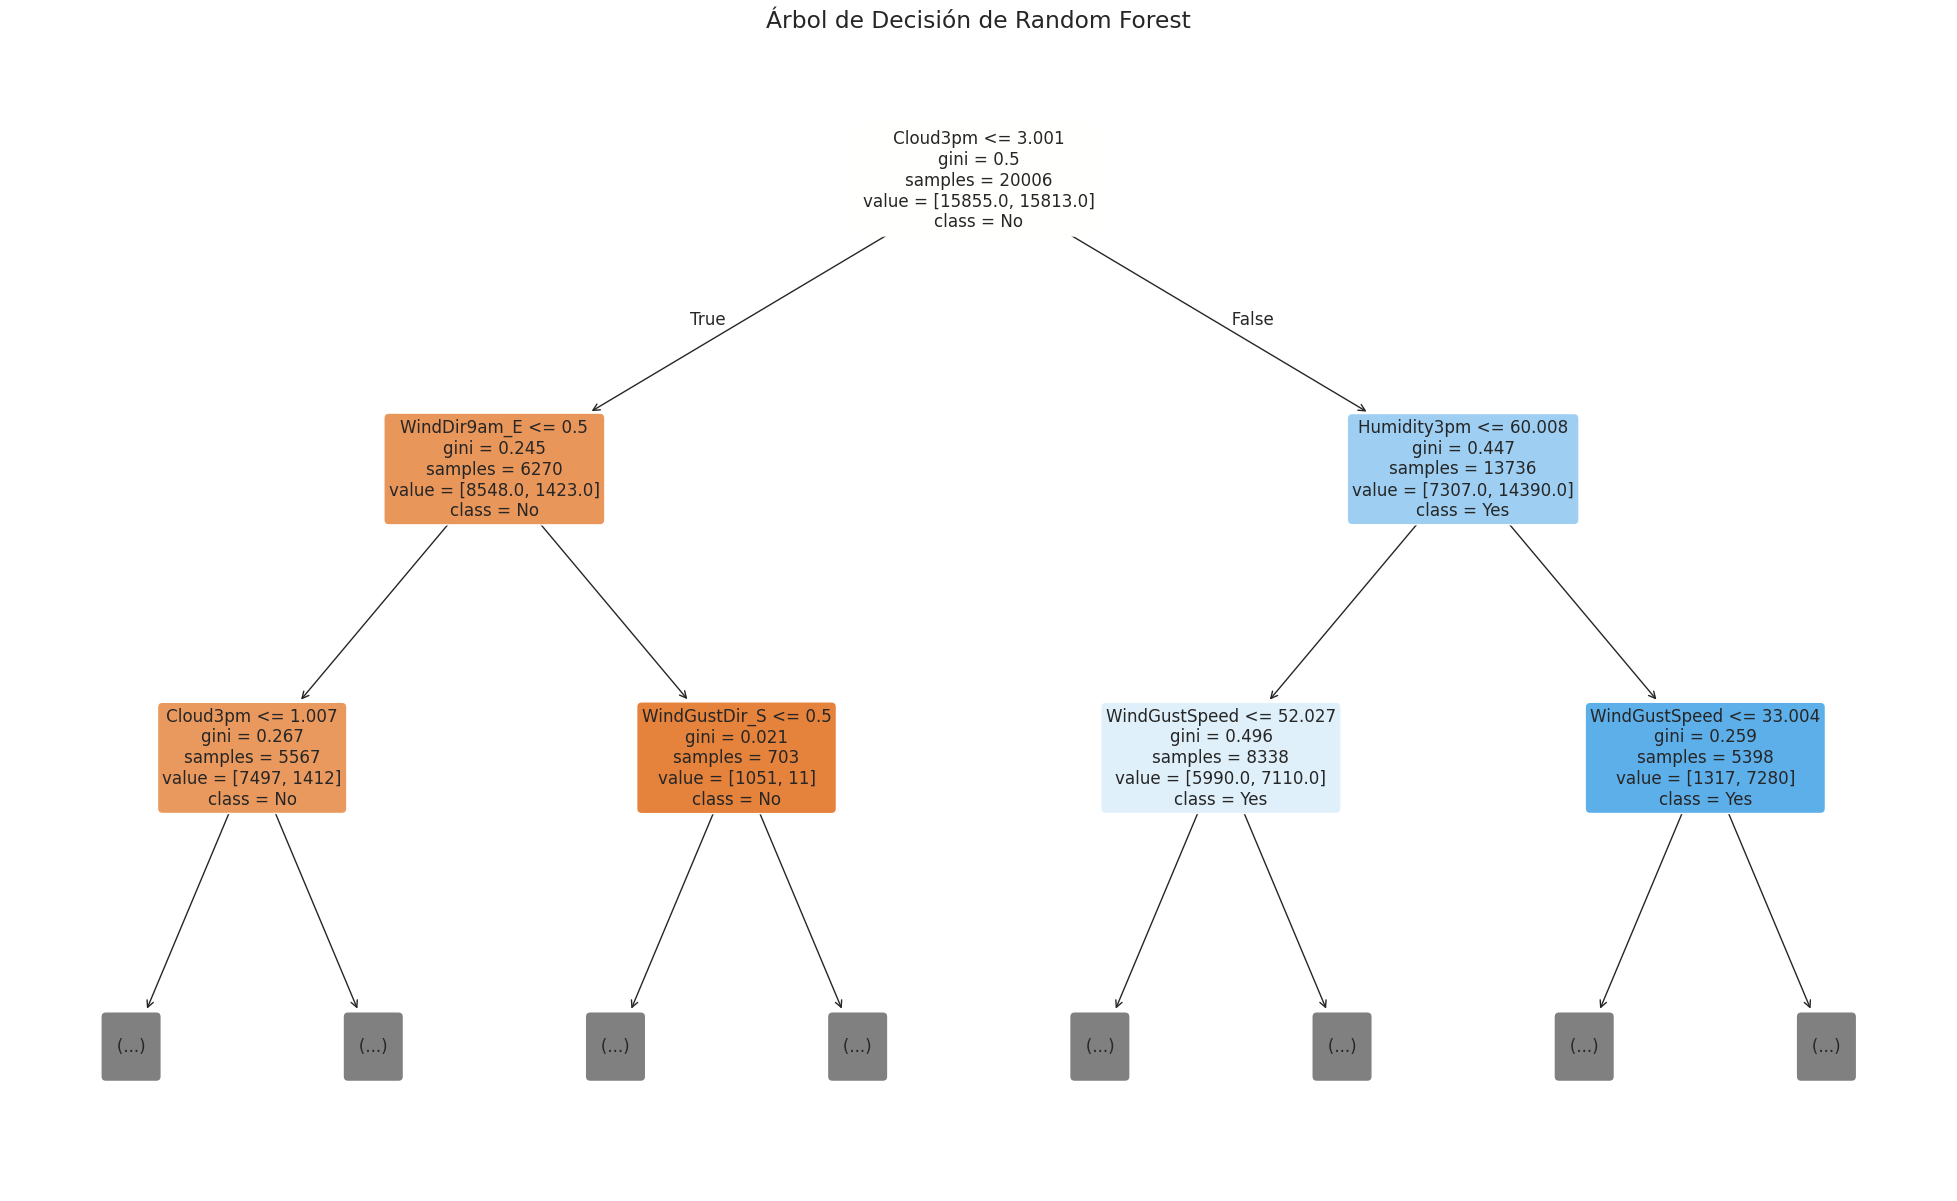

In [54]:
# Grafico arbol
plt.figure(figsize=(25, 15))
plot_tree(best_rf.estimators_[0], filled=True, feature_names=x_train.columns, class_names=['No', 'Yes'], rounded=True, max_depth=2)
plt.title('Árbol de Decisión de Random Forest')
plt.show()

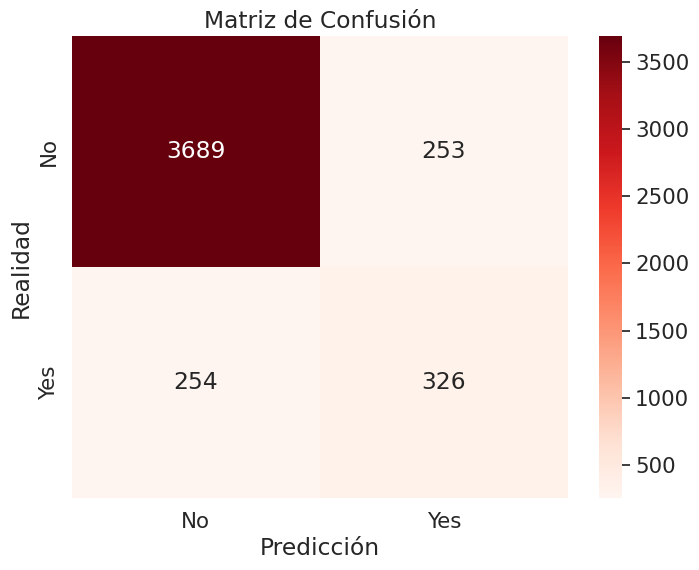

Precisión en el conjunto de prueba: 88.79%
Precisión en el conjunto de entrenamiento: 100.00%
Accuracy: 88.79%
Recall: 56.21%
Precision: 56.30%
F1 Score: 0.56


In [55]:
y_pred = best_rf.predict(x_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Tamaño de la fuente
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=True,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Metricas
accuracy = (y_pred == y_test).mean()
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

y_train_pred = best_tree.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("F1 Score: {:.2f}".format(f1))

### Modelo 3: Gradient boosting

In [56]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],               # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],            # Tasa de aprendizaje
    'max_depth': [5, 15, 10, 20],                   # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],              # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 3, 6],                # Número mínimo de muestras en una hoja
    'subsample': [0.8, 1.0],                       # Fracción de muestras usadas en cada árbol
}

# Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,
                                   n_iter=20, cv=15, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

print("Mejores hiperparámetros: ", random_search.best_params_)

Mejores hiperparámetros:  {'subsample': 1.0, 'n_estimators': 25, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 15, 'learning_rate': 0.1}


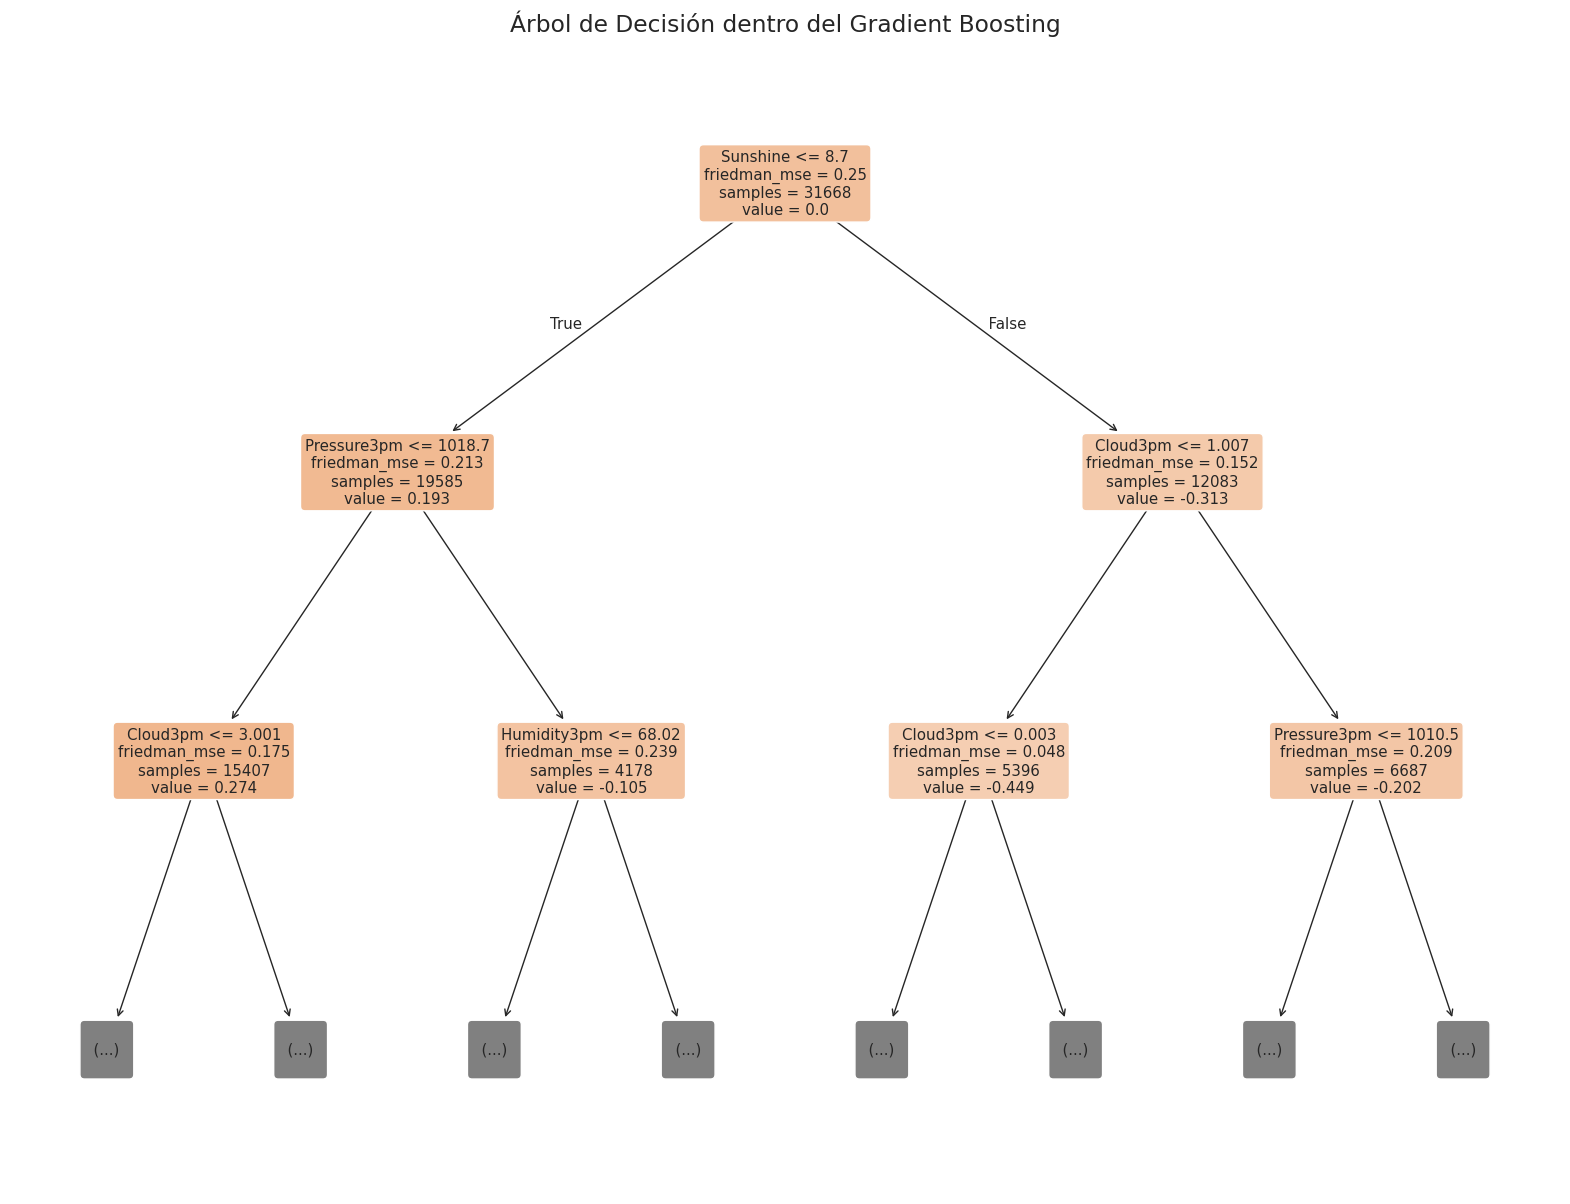

In [57]:
best_gbc = random_search.best_estimator_
# Grafico arbol
plt.figure(figsize=(20, 15))
plot_tree(best_gbc.estimators_[0, 0], filled=True, feature_names=x_train.columns, class_names=['No', 'Yes'], rounded=True, max_depth=2)
plt.title('Árbol de Decisión dentro del Gradient Boosting')
plt.show()

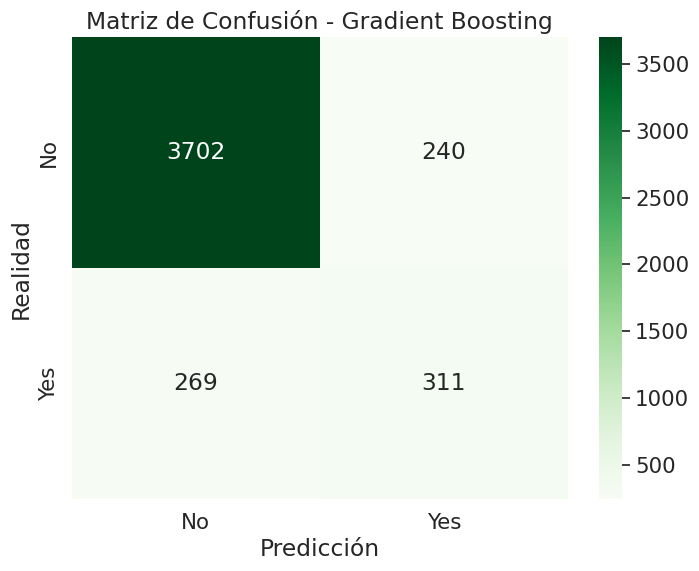

Precisión en el conjunto de prueba: 88.74%
Precisión en el conjunto de entrenamiento: 100.00%
Accuracy: 88.74%
Recall: 53.62%
Precision: 56.44%
F1 Score: 0.55


In [58]:
# Hacer predicciones en el conjunto de prueba
y_pred = best_gbc.predict(x_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Matriz de Confusión - Gradient Boosting')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Metricas
accuracy = (y_pred == y_test).mean()
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

y_train_pred = best_tree.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("F1 Score: {:.2f}".format(f1))